In [806]:
import numpy as np   
import pandas as pd
import os
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt   
import matplotlib.style
plt.style.use('seaborn')
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [807]:
df = pd.read_excel('Election_Data.xlsx', sheet_name='Election_Dataset_Two Classes')

In [808]:
df.head(10)

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male
5,6,Labour,47,3,4,4,4,4,2,male
6,7,Labour,57,2,2,4,4,11,2,male
7,8,Labour,77,3,4,4,1,1,0,male
8,9,Labour,39,3,3,4,4,11,0,female
9,10,Labour,70,3,2,5,1,11,2,male


In [809]:
data_dict=pd.read_excel('Election_Data.xlsx')
# Importing Data Dictionary

In [810]:
pd.options.display.max_colwidth = 200
pd.set_option('display.max_columns', None)
data_dict

,**Data Dictionary**
0,1. vote: Party choice: Conservative or Labour
1,2. age: in years
2,"3. economic.cond.national: Assessment of current national economic conditions, 1 to 5."
3,"4. economic.cond.household: Assessment of current household economic conditions, 1 to 5."
4,"5. Blair: Assessment of the Labour leader, 1 to 5."
5,"6. Hague: Assessment of the Conservative leader, 1 to 5."
6,7. Europe: an 11-point scale that measures respondents' attitudes toward European integration. High scores represent ‘Eurosceptic’ sentiment.
7,"8. political.knowledge: Knowledge of parties' positions on European integration, 0 to 3."
8,9. gender: female or male.


In [811]:
print('The shape of the dataset:', df.shape)

The shape of the dataset: (1525, 10)


In [812]:
df = df.drop('Unnamed: 0', axis = 1)

In [813]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


In [814]:
cat=["vote","gender"]

<AxesSubplot:>

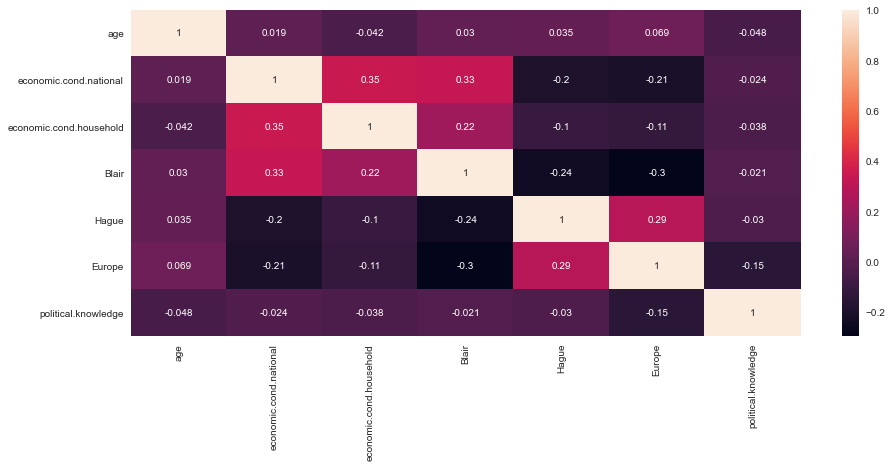

In [815]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(),annot=True)

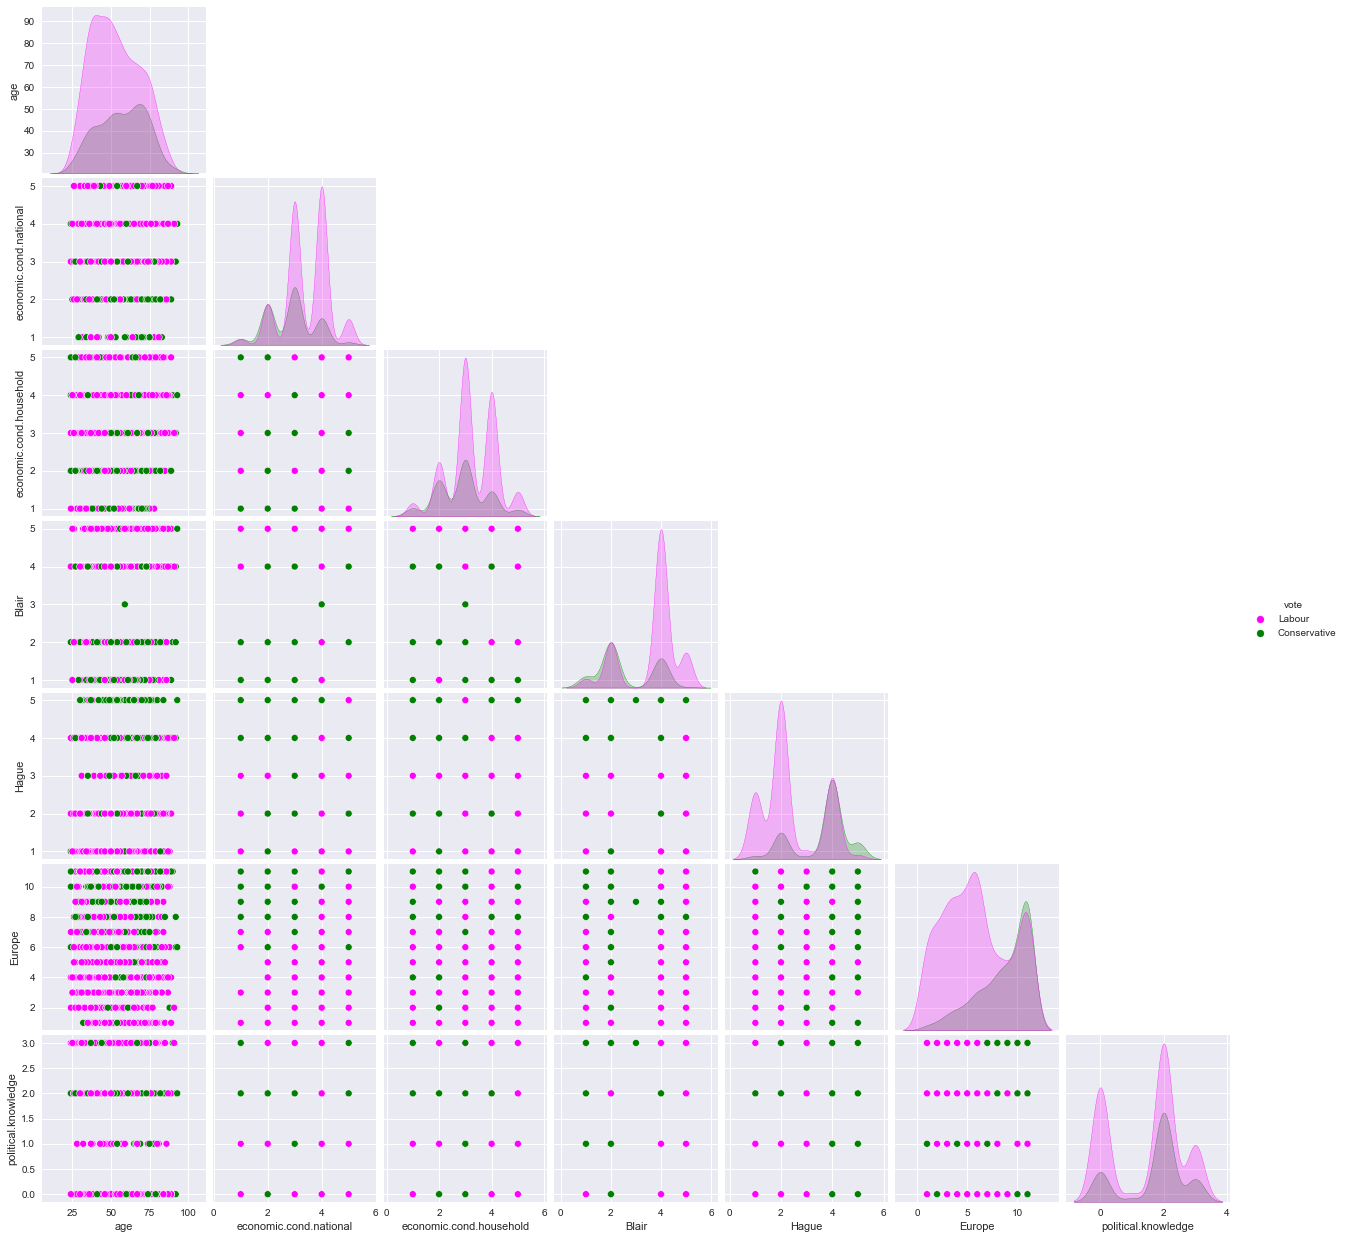

In [816]:
ax = sns.pairplot(data=df,hue='vote', palette=['magenta','green'], diag_kind='kde')
for i, j in zip(*np.triu_indices_from(ax.axes, 1)):
    ax.axes[i, j].set_visible(False)

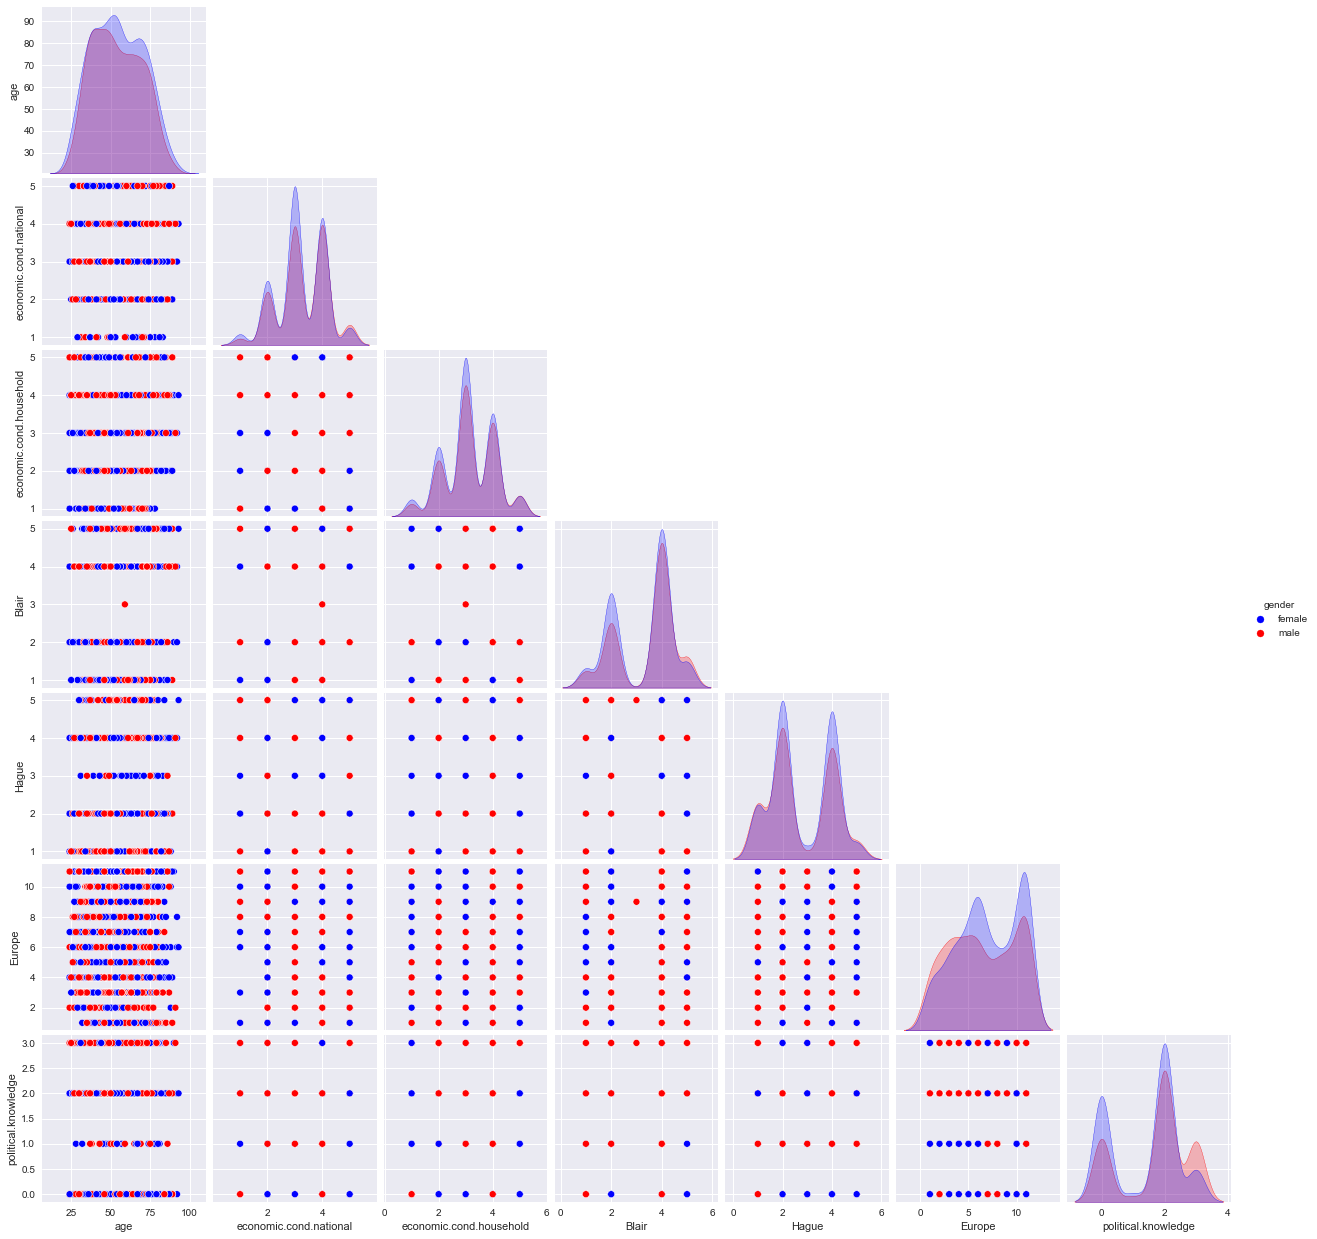

In [817]:
ax = sns.pairplot(df,hue='gender', palette=['blue','red'], diag_kind='kde')
for i, j in zip(*np.triu_indices_from(ax.axes, 1)):
    ax.axes[i, j].set_visible(False)

In [818]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1525.0,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0


In [819]:
df[cat].describe().T

,count,unique,top,freq
vote,1525,2,Labour,1063
gender,1525,2,female,812


In [820]:
df['economic.cond.national'].value_counts()

3    607
4    542
2    257
5     82
1     37
Name: economic.cond.national, dtype: int64

In [821]:
df['economic.cond.household'].value_counts()

3    648
4    440
2    280
5     92
1     65
Name: economic.cond.household, dtype: int64

In [822]:
df['Blair'].value_counts()

4    836
2    438
5    153
1     97
3      1
Name: Blair, dtype: int64

In [823]:
df['Hague'].value_counts()

2    624
4    558
1    233
5     73
3     37
Name: Hague, dtype: int64

In [824]:
df['Europe'].value_counts()

11    338
6     209
3     129
4     127
5     124
8     112
9     111
1     109
10    101
7      86
2      79
Name: Europe, dtype: int64

In [825]:
df['political.knowledge'].value_counts()

2    782
0    455
3    250
1     38
Name: political.knowledge, dtype: int64

In [826]:
df['gender'].value_counts()

female    812
male      713
Name: gender, dtype: int64

In [827]:
cat=["economic.cond.national","economic.cond.household","Blair","Hague","Europe","political.knowledge","gender"]

In [828]:
for i in cat:
    df[i]=df[i].astype("object")

In [829]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   object
 3   economic.cond.household  1525 non-null   object
 4   Blair                    1525 non-null   object
 5   Hague                    1525 non-null   object
 6   Europe                   1525 non-null   object
 7   political.knowledge      1525 non-null   object
 8   gender                   1525 non-null   object
dtypes: int64(1), object(8)
memory usage: 107.4+ KB


In [830]:
#add a new column category next to the age group. 
category = pd.cut(df.age,
                  bins=[0,35,50,65,80,99],
                  labels=[1,2,3,4,5])
df.insert(6,'Age_Group',category)
df['Age_Group'].value_counts()

2    479
3    416
4    367
1    201
5     62
Name: Age_Group, dtype: int64

In [831]:
cat=["vote","economic.cond.national","economic.cond.household","Blair","Hague","Europe","political.knowledge","gender", "Age_Group"]

In [832]:
for i in cat:
    df[i]=df[i].astype("object")

In [833]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   object
 3   economic.cond.household  1525 non-null   object
 4   Blair                    1525 non-null   object
 5   Hague                    1525 non-null   object
 6   Age_Group                1525 non-null   object
 7   Europe                   1525 non-null   object
 8   political.knowledge      1525 non-null   object
 9   gender                   1525 non-null   object
dtypes: int64(1), object(9)
memory usage: 119.3+ KB


In [834]:
df[cat].describe().T

,count,unique,top,freq
vote,1525,2,Labour,1063
economic.cond.national,1525,5,3,607
economic.cond.household,1525,5,3,648
Blair,1525,5,4,836
Hague,1525,5,2,624
Europe,1525,11,11,338
political.knowledge,1525,4,2,782
gender,1525,2,female,812
Age_Group,1525,5,2,479


In [835]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1525.0,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0


In [836]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

VOTE :  2
Conservative     462
Labour          1063
Name: vote, dtype: int64


ECONOMIC.COND.NATIONAL :  5
1     37
5     82
2    257
4    542
3    607
Name: economic.cond.national, dtype: int64


ECONOMIC.COND.HOUSEHOLD :  5
1     65
5     92
2    280
4    440
3    648
Name: economic.cond.household, dtype: int64


BLAIR :  5
3      1
1     97
5    153
2    438
4    836
Name: Blair, dtype: int64


HAGUE :  5
3     37
5     73
1    233
4    558
2    624
Name: Hague, dtype: int64


AGE_GROUP :  5
5     62
1    201
4    367
3    416
2    479
Name: Age_Group, dtype: int64


EUROPE :  11
2      79
7      86
10    101
1     109
9     111
8     112
5     124
4     127
3     129
6     209
11    338
Name: Europe, dtype: int64


POLITICAL.KNOWLEDGE :  4
1     38
3    250
0    455
2    782
Name: political.knowledge, dtype: int64


GENDER :  2
male      713
female    812
Name: gender, dtype: int64




In [837]:
df.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Age_Group                  0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [838]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df[dups]

Number of duplicate rows = 8


,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Age_Group,Europe,political.knowledge,gender
67,Labour,35,4,4,5,2,1,3,2,male
626,Labour,39,3,4,4,2,2,5,2,male
870,Labour,38,2,4,2,2,2,4,3,male
983,Conservative,74,4,3,2,4,4,8,2,female
1154,Conservative,53,3,4,2,2,3,6,0,female
1236,Labour,36,3,3,2,2,2,6,2,female
1244,Labour,29,4,4,4,2,1,2,2,female
1438,Labour,40,4,3,4,2,2,2,2,male


In [839]:
df.rename(columns = {"economic.cond.national": "economic_cond_national","economic.cond.household": "economic_cond_household","political.knowledge":"political_knowledge"},inplace=True)

In [840]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic_cond_national   1525 non-null   object
 3   economic_cond_household  1525 non-null   object
 4   Blair                    1525 non-null   object
 5   Hague                    1525 non-null   object
 6   Age_Group                1525 non-null   object
 7   Europe                   1525 non-null   object
 8   political_knowledge      1525 non-null   object
 9   gender                   1525 non-null   object
dtypes: int64(1), object(9)
memory usage: 119.3+ KB


### UNIVARIATE & BIVARIATE ANALYSIS

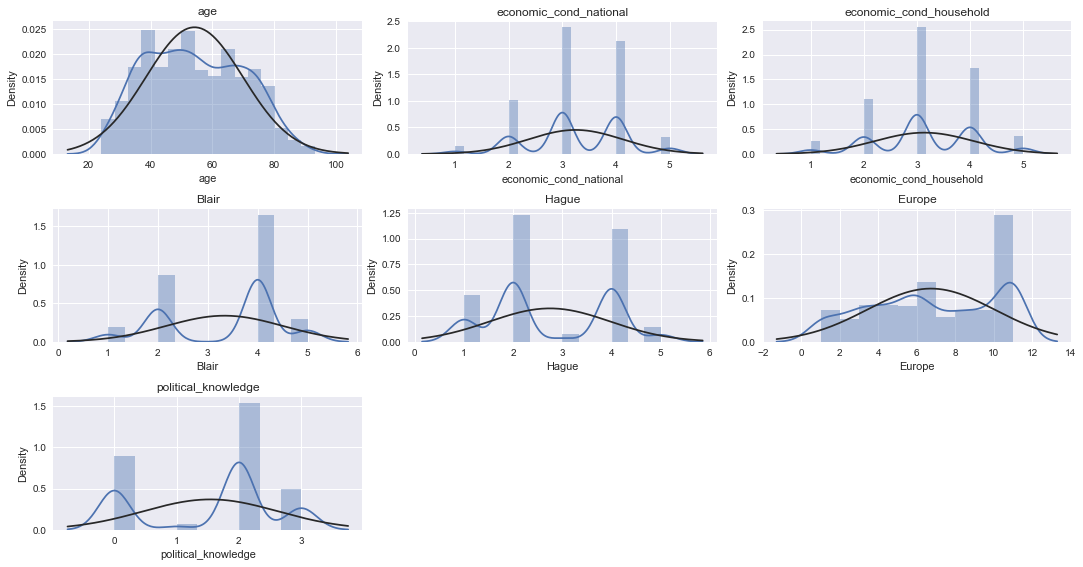

In [841]:
#A quick check on variables

from scipy.stats import norm 

graph_by_variables = ['age', 'economic_cond_national', 'economic_cond_household', 'Blair', 'Hague', 'Europe', 'political_knowledge']
plt.figure(figsize=(15,18))

for i in range(0,7):
    plt.subplot(7,3,i+1)
    sns.distplot(df[graph_by_variables[i]].dropna(),fit=norm)
    plt.title(graph_by_variables[i])

plt.tight_layout()

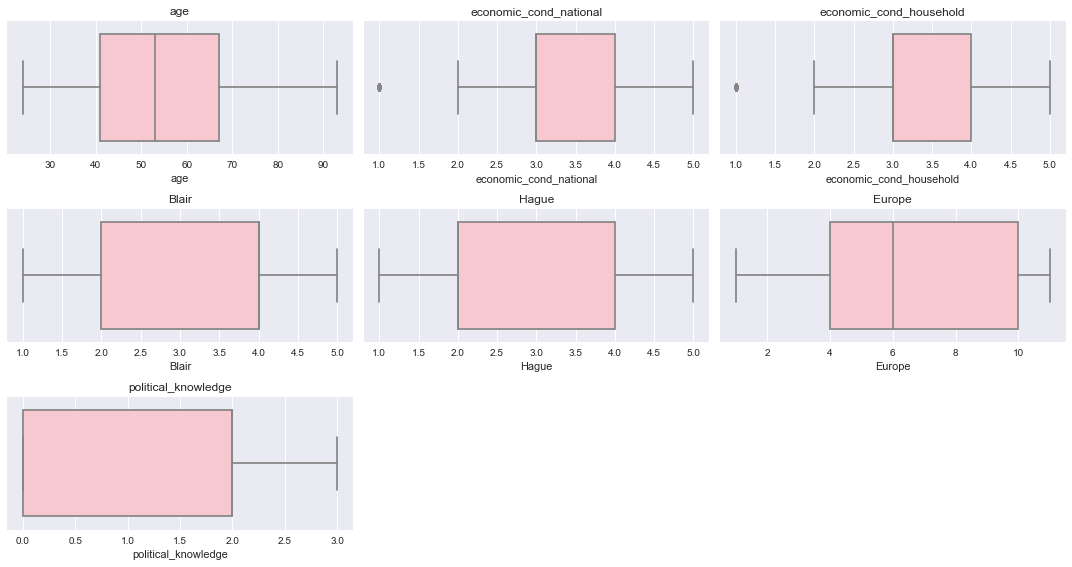

In [842]:
graph_by_variables = ['age', 'economic_cond_national', 'economic_cond_household', 'Blair', 'Hague', 'Europe', 'political_knowledge']
plt.figure(figsize=(15,18))

for i in range(0,7):
    plt.subplot(7,3,i+1)
    sns.boxplot(df[graph_by_variables[i]].dropna(), color='pink')
    plt.title(graph_by_variables[i])

plt.tight_layout()

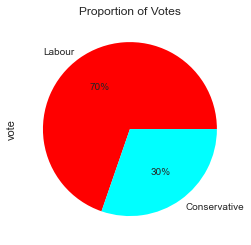

In [843]:
colors = ['red','cyan']
df.vote.value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', colors = colors)
plt.title('Proportion of Votes');

Text(0, 0.5, 'Counts')

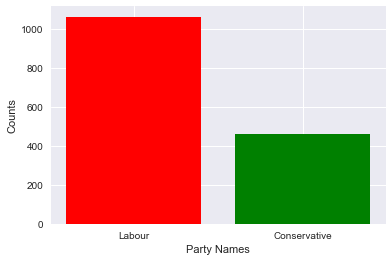

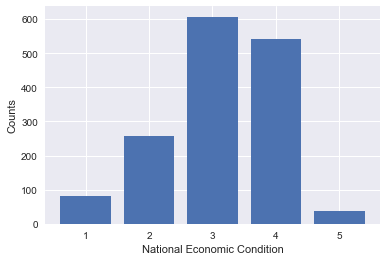

In [844]:
#fig,ax=plt.subplots(ncols=2)
plt.figure(1)
plt.bar(x=df['vote'].unique(), height=df['vote'].value_counts(),color=['Red','Green'])
plt.xlabel('Party Names')
plt.ylabel('Counts')
#We can clearly see that labour party has got more votes than cconservative


plt.figure(2)
plt.bar(x=df['economic_cond_national'].unique(), height=df['economic_cond_national'].value_counts())
plt.xlabel('National Economic Condition')
plt.ylabel('Counts')

# National Economic Condition for most people belongs to category no. - 3

Text(0, 0.5, 'Counts')

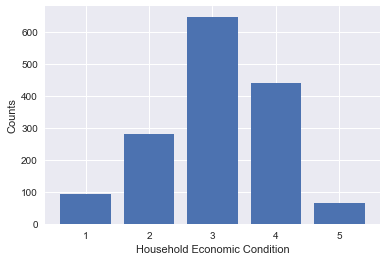

In [845]:
plt.bar(x=df['economic_cond_household'].unique(), height=df['economic_cond_household'].value_counts())
plt.xlabel('Household Economic Condition')
plt.ylabel('Counts')

# Household Economic Condition for most people belongs to category no. - 3

Text(0, 0.5, 'Counts')

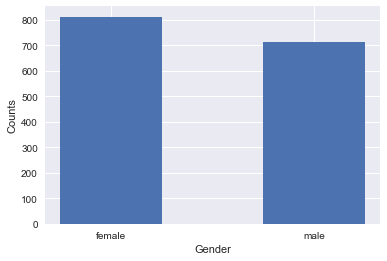

In [846]:
plt.bar(x=df['gender'].unique(), height=df['gender'].value_counts(),width=0.5)
plt.xlabel('Gender')
plt.ylabel('Counts')

#Female voters are more as compared to male voters.

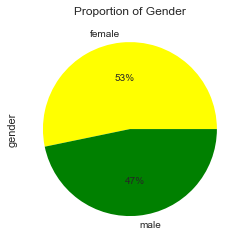

In [847]:
colors = ['yellow','green']
df.gender.value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', colors = colors)
plt.title('Proportion of Gender');

<Figure size 864x576 with 0 Axes>

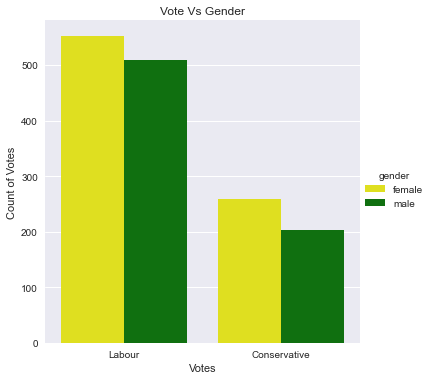

In [848]:
plt.figure(figsize=(12,8))
ax = sns.catplot(x="vote", hue="gender", kind="count", data=df, palette = colors)
plt.title('Vote Vs Gender')
plt.xlabel('Votes')
plt.ylabel('Count of Votes');

Text(0.5, 0, 'Age')

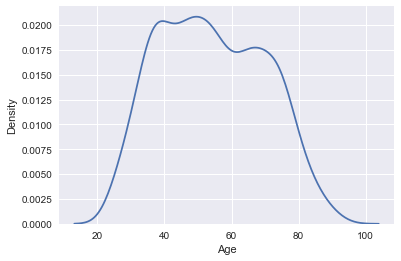

In [849]:
sns.kdeplot(df['age'])
plt.xlabel('Age')
#Age is normally distributed

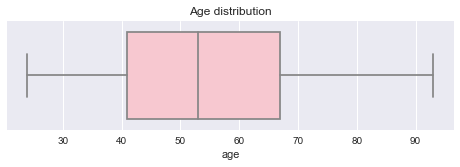

In [850]:
plt.figure(figsize=(8,2))
plt.title('Age distribution',fontsize=12)
sns.boxplot(df['age'] , orient = "h", color = 'pink');

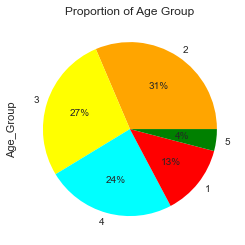

In [851]:
colors = ['orange','yellow','cyan','red','green']
df.Age_Group.value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', colors = colors)
plt.title('Proportion of Age Group');

In [852]:
df[df.vote == "Labour"].age.mean()

53.01411100658514

In [853]:
df[df.vote == "Conservative"].age.mean()

56.87012987012987

<AxesSubplot:xlabel='vote', ylabel='economic_cond_national'>

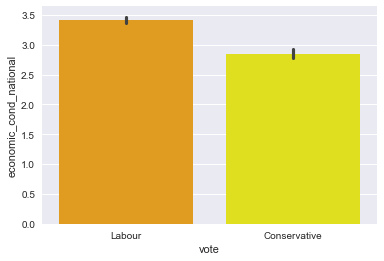

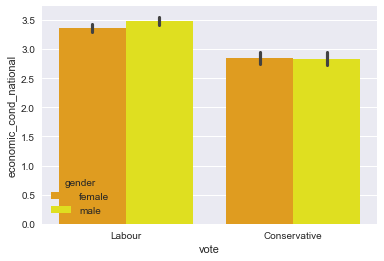

In [854]:
plt.figure(1)
sns.barplot(x=df['vote'],y=df['economic_cond_national'], palette = colors)
#Those who have voted for Labour party has higher Economic National Condition

plt.figure(2)
sns.barplot(x=df['vote'],y=df['economic_cond_national'],hue=df['gender'], palette = colors)
#No such clear distinction between gender can be made through this

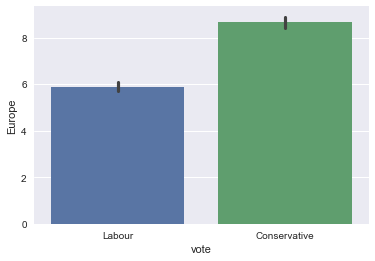

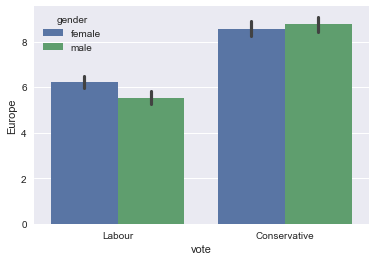

In [855]:
plt.figure(1)
sns.barplot(x=df['vote'],y=df['Europe'])
#Those who have voted for conservative party have higher Eurosceptic sentiments

plt.figure(2)
sns.barplot(x=df['vote'],y=df['Europe'],hue=df['gender'])
plt.show()
#There is not much variation between gender preferences in deciding  Eurosceptic sentiments

In [856]:
df.economic_cond_national.value_counts(normalize=True)

3    0.398033
4    0.355410
2    0.168525
5    0.053770
1    0.024262
Name: economic_cond_national, dtype: float64

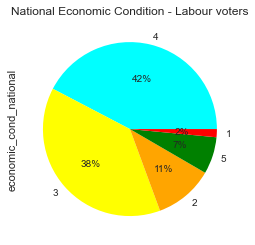

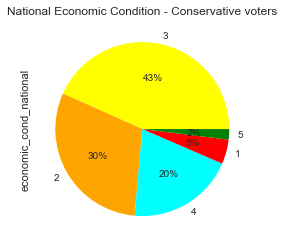

In [857]:
#colors = [1'red',2'orange',3'yellow',4'cyan',5'green'] #1,2,3,4,5
colors = ['cyan','yellow','orange','green','red']
plt.figure(0)
#df.economic_cond_national.value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', colors = colors)
df[df.vote == "Labour"].economic_cond_national.value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', colors = colors)
plt.title('National Economic Condition - Labour voters')
colors = ['yellow','orange','cyan','red','green']
plt.figure(1)
df[df.vote == "Conservative"].economic_cond_national.value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', colors = colors)
plt.title('National Economic Condition - Conservative voters')
plt.show()

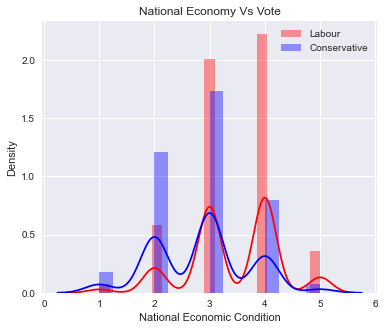

In [858]:
f, ax = plt.subplots(figsize = (6,5))
sns.distplot(df[df.vote=='Labour'].economic_cond_national, label = 'Labour', color = 'red')
sns.distplot(df[df.vote=='Conservative'].economic_cond_national, label = 'Conservative', color = 'blue')
ax.set_title("National Economy Vs Vote",fontsize=12)
ax.set_xlabel('National Economic Condition')
ax.legend(ncol = 1)
sns.despine(left = True, bottom = True)
plt.show()

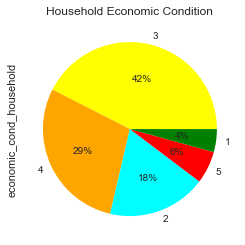

In [859]:
df.economic_cond_household.value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', colors = colors)
plt.title('Household Economic Condition')
plt.show()

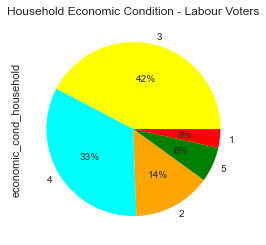

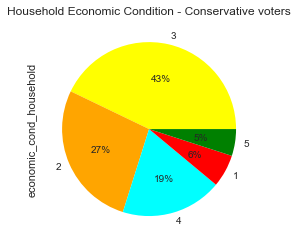

In [860]:
colors = ['yellow','cyan','orange','green', 'red']
plt.figure(0)
df[df.vote == "Labour"].economic_cond_household.value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', colors = colors)
plt.title('Household Economic Condition - Labour Voters')
plt.figure(1)
colors = ['yellow','orange','cyan','red','green']
df[df.vote == "Conservative"].economic_cond_household.value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', colors = colors)
plt.title('Household Economic Condition - Conservative voters')
plt.show()

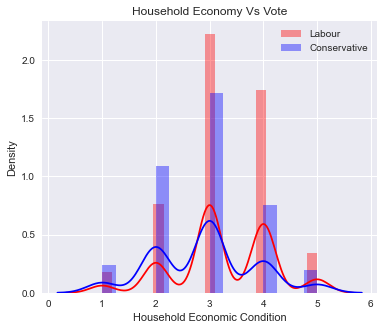

In [861]:
f, ax = plt.subplots(figsize = (6,5))
sns.distplot(df[df.vote=='Labour'].economic_cond_household, label = 'Labour', color = 'red')
sns.distplot(df[df.vote=='Conservative'].economic_cond_household, label = 'Conservative', color = 'blue')
ax.set_title("Household Economy Vs Vote",fontsize=12)
ax.set_xlabel('Household Economic Condition')
ax.legend(ncol = 1)
sns.despine(left = True, bottom = True)
plt.show()

In [862]:
df[df.vote=='Conservative'].Blair.value_counts(normalize=True)

2    0.523810
4    0.339827
1    0.127706
5    0.006494
3    0.002165
Name: Blair, dtype: float64

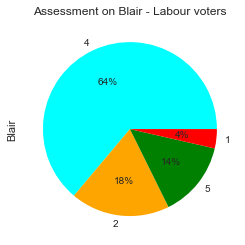

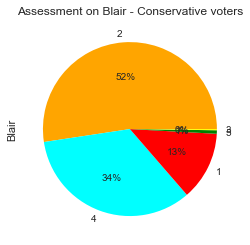

In [863]:
colors = ['cyan','orange','green','red','yellow']
plt.figure(0)
df[df.vote == "Labour"].Blair.value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', colors = colors)
plt.title('Assessment on Blair - Labour voters')
plt.figure(1)
colors = ['orange','cyan','red','green','yellow']
df[df.vote == "Conservative"].Blair.value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', colors = colors)
plt.title('Assessment on Blair - Conservative voters')
plt.show()

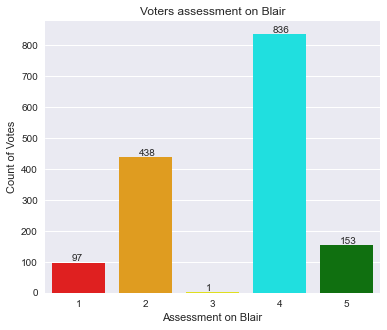

In [864]:
colors = ['red','orange','yellow','cyan','green']
#ax = sns.catplot(x="Blair",kind="count", data=df, palette = colors, label = (1,2,3,4,5))
plt.figure(figsize=(6,5))
ax = sns.countplot(df.Blair,palette = colors)
plt.title('Voters assessment on Blair')
plt.xlabel('Assessment on Blair')
plt.ylabel('Count of Votes')
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()),
                    (p.get_x()+.3,
                     p.get_height()+5))

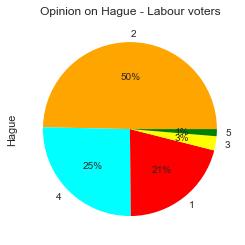

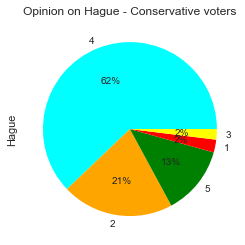

In [865]:
colors = ['orange','cyan','red','yellow','green']
plt.figure(0)
df[df.vote == "Labour"].Hague.value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', colors = colors)
plt.title('Opinion on Hague - Labour voters')
plt.figure(1)
colors = ['cyan','orange','green','red','yellow']
df[df.vote == "Conservative"].Hague.value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', colors = colors)
plt.title('Opinion on Hague - Conservative voters')
plt.show()

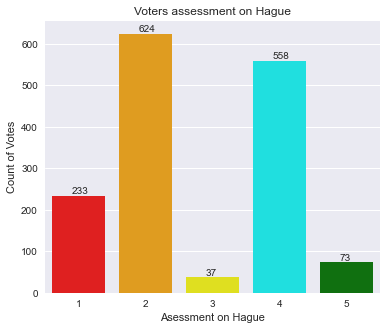

In [866]:
colors = ['red','orange','yellow','cyan','green']
#ax = sns.catplot(x="Blair",kind="count", data=df, palette = colors, label = (1,2,3,4,5))
plt.figure(figsize=(6,5))
ax = sns.countplot(df.Hague,palette = colors)
plt.title('Voters assessment on Hague')
plt.xlabel('Asessment on Hague')
plt.ylabel('Count of Votes')
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()),
                    (p.get_x()+.3,
                     p.get_height()+5))

In [867]:
df.Hague.value_counts(normalize=True)

2    0.409180
4    0.365902
1    0.152787
5    0.047869
3    0.024262
Name: Hague, dtype: float64

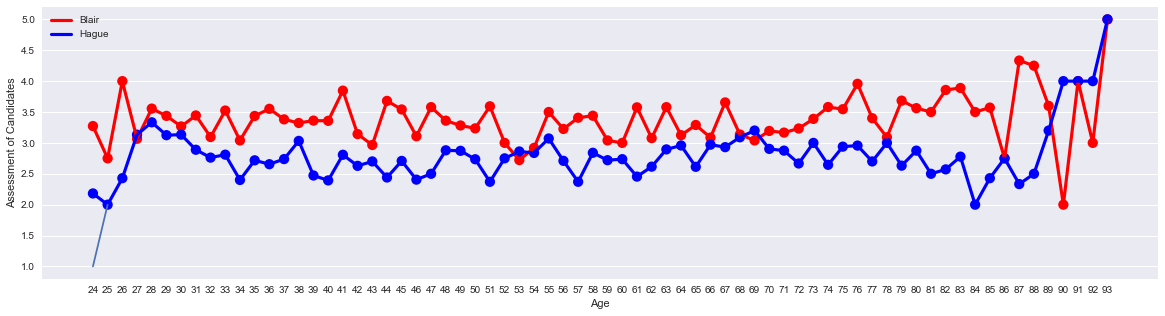

In [868]:
f, ax = plt.subplots(figsize = (20,5))
ax = sns.pointplot(x='age', y="Blair", data=df, ci = None, color = 'red',label1 = 'Blair')
#sns.lineplot(data=df.age, ci = None)
ax=sns.pointplot(x="age", y="Hague", data=df, ci = None, color = 'blue', label2 = 'Hague')
ax.set_xlabel('Age')
ax.set_ylabel('Assessment of Candidates')

ax.plot([1, 2])
ax.legend(['Blair', 'Hague'])

plt.show()

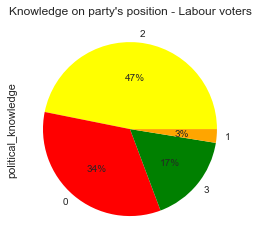

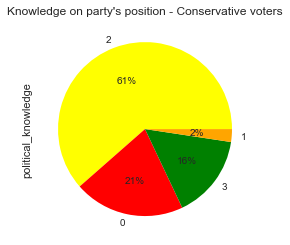

In [869]:
colors = ['yellow','red','green','orange']
plt.figure(0)
df[df.vote == "Labour"].political_knowledge.value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', colors = colors)
plt.title("Knowledge on party's position - Labour voters")
plt.figure(1)
df[df.vote == "Conservative"].political_knowledge.value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', colors = colors)
plt.title("Knowledge on party's position - Conservative voters")
plt.show()

In [870]:
df.political_knowledge.value_counts(normalize=True)

2    0.512787
0    0.298361
3    0.163934
1    0.024918
Name: political_knowledge, dtype: float64

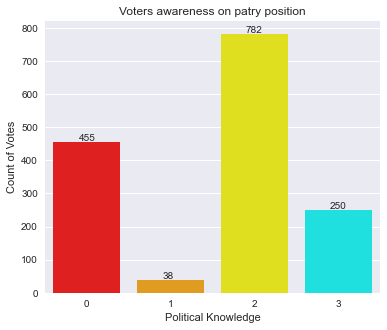

In [871]:
colors = ['red','orange','yellow','cyan','green']
#ax = sns.catplot(x="Blair",kind="count", data=df, palette = colors, label = (1,2,3,4,5))
plt.figure(figsize=(6,5))
ax = sns.countplot(df.political_knowledge,palette = colors)
plt.title('Voters awareness on patry position')
plt.xlabel('Political Knowledge')
plt.ylabel('Count of Votes')
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()),
                    (p.get_x()+.3,
                     p.get_height()+5))

<Figure size 864x576 with 0 Axes>

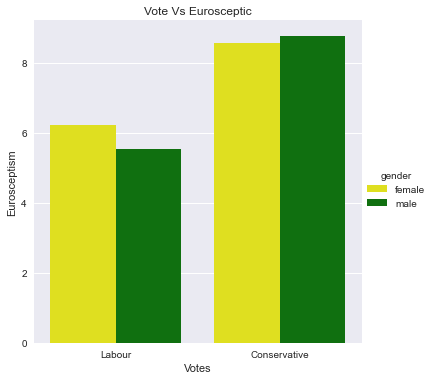

In [872]:
colors = ['yellow','green']
plt.figure(figsize=(12,8))
ax = sns.catplot(x="vote", y="Europe", hue = 'gender', kind="bar", data=df, palette = colors , ci=None)
plt.title('Vote Vs Eurosceptic')
plt.xlabel('Votes')
plt.ylabel('Eurosceptism');

<Figure size 864x576 with 0 Axes>

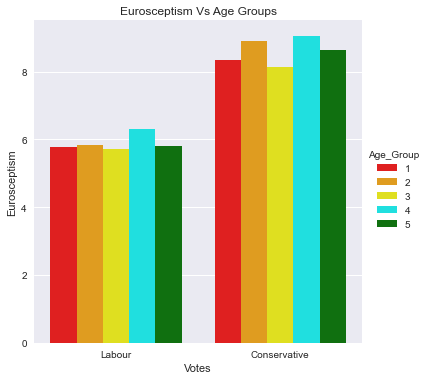

In [873]:
colors = ['red','orange','yellow','cyan','green']
plt.figure(figsize=(12,8))
ax = sns.catplot(x="vote", y="Europe", hue = 'Age_Group', kind="bar", data=df, palette = colors, ci=None)
plt.title('Eurosceptism Vs Age Groups')
plt.xlabel('Votes')
plt.ylabel('Eurosceptism');

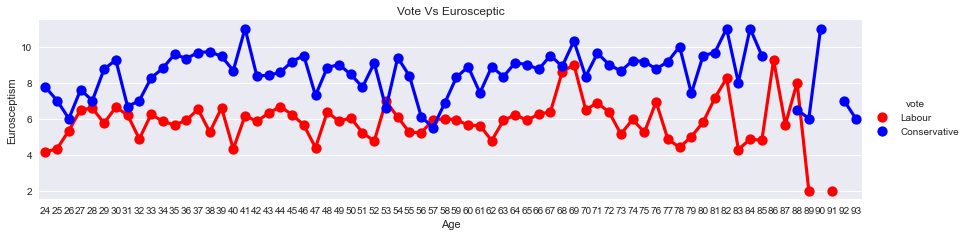

In [874]:
sns.catplot(x="age", y="Europe", hue = 'vote', kind="point", data=df, ci = None, palette = ['red','blue'], height = 3, aspect = 4 )
plt.title('Vote Vs Eurosceptic')
plt.xlabel('Age')
plt.ylabel('Eurosceptism');

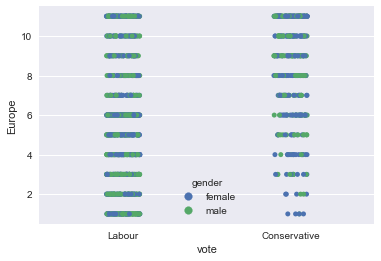

In [875]:
plt.figure(figsize=(6,4))
sns.stripplot(df.vote, df.Europe, hue = df.gender, jitter=True) 
plt.show()

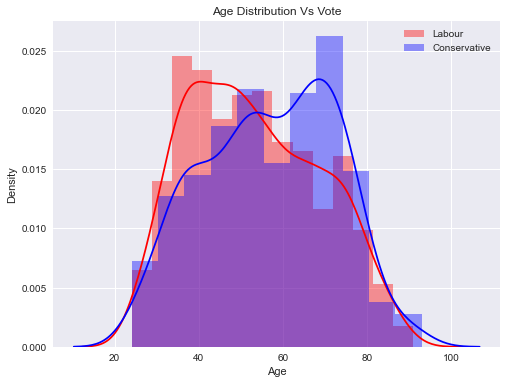

In [876]:
f, ax = plt.subplots(figsize = (8,6))
sns.distplot(df[df.vote=='Labour'].age, label = 'Labour', color = 'red')
sns.distplot(df[df.vote=='Conservative'].age, label = 'Conservative', color = 'blue')
ax.set_title("Age Distribution Vs Vote",fontsize=12)
ax.set_xlabel('Age')
ax.legend(ncol = 1)
sns.despine(left = True, bottom = True)
plt.show()

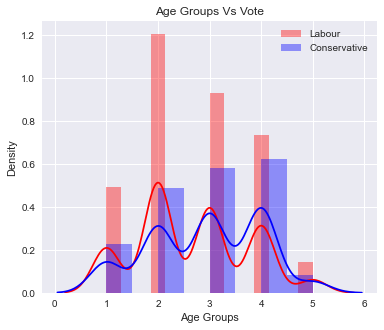

In [877]:
f, ax = plt.subplots(figsize = (6,5))
sns.distplot(df[df.vote=='Labour'].Age_Group, label = 'Labour', color = 'red')
sns.distplot(df[df.vote=='Conservative'].Age_Group, label = 'Conservative', color = 'blue')
ax.set_title("Age Groups Vs Vote",fontsize=12)
ax.set_xlabel('Age Groups')
ax.legend(ncol = 1)
sns.despine(left = True, bottom = True)
plt.show()

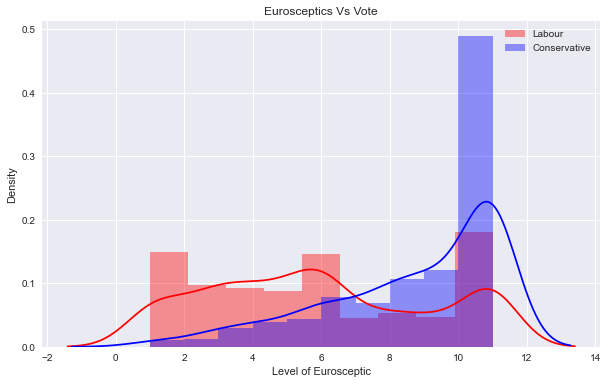

In [878]:
f, ax = plt.subplots(figsize = (10,6))
sns.distplot(df[df.vote=='Labour'].Europe, label = 'Labour', color = 'red')
sns.distplot(df[df.vote=='Conservative'].Europe, label = 'Conservative', color = 'blue')
ax.set_title("Eurosceptics Vs Vote",fontsize=12)
ax.set_xlabel('Level of Eurosceptic')
ax.legend(ncol = 1)
sns.despine(left = True, bottom = True)
plt.show()

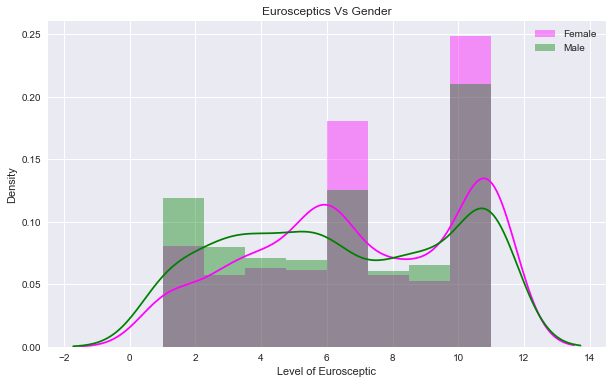

In [879]:
f, ax = plt.subplots(figsize = (10,6))
sns.distplot(df[df.gender=='female'].Europe, label = 'Female', color = 'magenta')
sns.distplot(df[df.gender=='male'].Europe, label = 'Male', color = 'green')
ax.set_title("Eurosceptics Vs Gender",fontsize=12)
ax.set_xlabel('Level of Eurosceptic')
ax.legend(ncol = 1)
sns.despine(left = True, bottom = True)
plt.show()

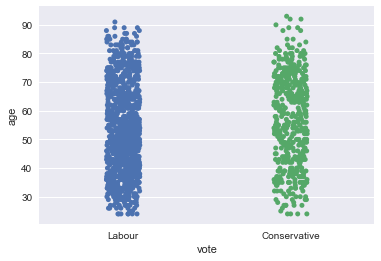

In [880]:
sns.stripplot(x=df['vote'],y=df['age']);

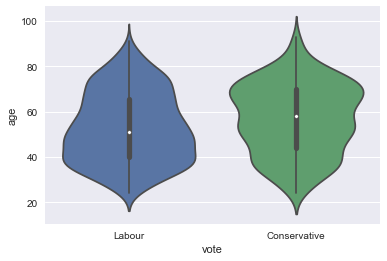

In [881]:
#Looking at the width of violin plot, those who have voted for Labour party, age of most of them lies near 40 to 50.
#Those who have voted for conservative party, age of most of them lies near 60 to 70.
sns.violinplot(x=df['vote'],y=df['age']);

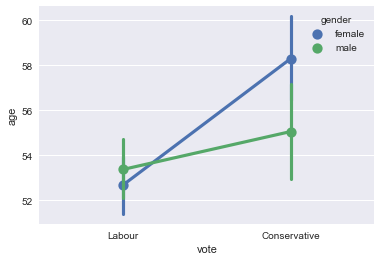

In [882]:
#Avg age of the female of those who have voted for Conservative party is higher than that of male
#Avg age of the female is somewhat near the avg age of male voters those who have voted for Labour party
sns.pointplot(x=df['vote'],y=df['age'],hue=df['gender']);

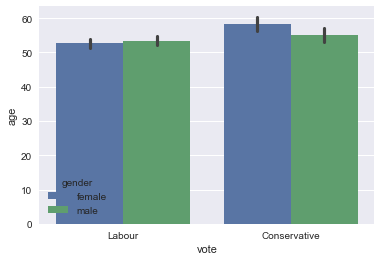

In [883]:
#Same as that of the above observation
sns.barplot(x=df['vote'],y=df['age'],hue=df['gender']);

<AxesSubplot:xlabel='Europe', ylabel='count'>

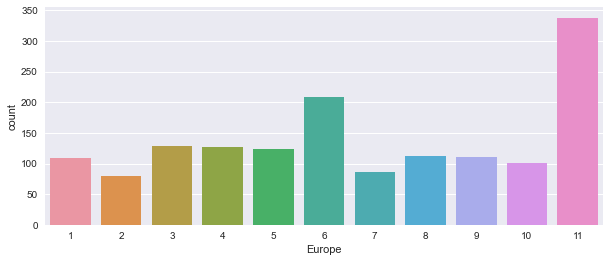

In [884]:
plt.figure(figsize=(10,4))
sns.countplot(df['Europe'])

#No. of counts corresponding 2 points is highest. Which shows that most of the people are in support of european integration

<AxesSubplot:>

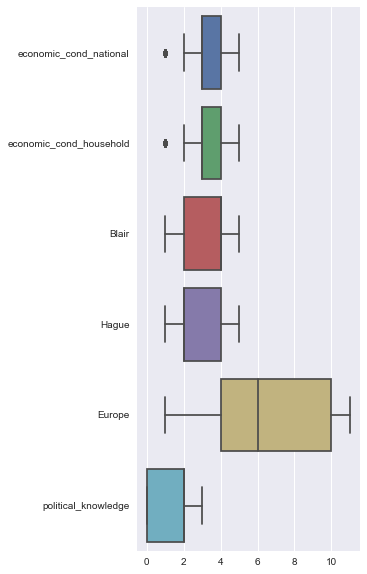

In [885]:
f, ax = plt.subplots(figsize = (4,10))
sns.set_color_codes('pastel')
sns.boxplot(data=df[['economic_cond_national','economic_cond_household','Blair','Hague','Europe','political_knowledge']] ,
                orient = "h")

In [886]:
#df.gender = df.gender.astype('category')
#df.gender = df.gender.cat.codes
df.vote = df.vote.astype('category')
df.vote = df.vote.cat.codes
df.head()
# Female 0, Male 1
# Conservative 0, Labour 1

,vote,age,economic_cond_national,economic_cond_household,Blair,Hague,Age_Group,Europe,political_knowledge,gender
0,1,43,3,3,4,1,2,2,2,female
1,1,36,4,4,4,4,2,5,2,male
2,1,35,4,4,5,2,1,3,2,male
3,1,24,4,2,2,1,1,4,0,female
4,1,41,2,2,1,1,2,6,2,male


In [887]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   int8  
 1   age                      1525 non-null   int64 
 2   economic_cond_national   1525 non-null   object
 3   economic_cond_household  1525 non-null   object
 4   Blair                    1525 non-null   object
 5   Hague                    1525 non-null   object
 6   Age_Group                1525 non-null   object
 7   Europe                   1525 non-null   object
 8   political_knowledge      1525 non-null   object
 9   gender                   1525 non-null   object
dtypes: int64(1), int8(1), object(8)
memory usage: 108.8+ KB


In [888]:
cat=[]
num=[]
for i in df.columns:
    if df[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat) 
print(num)

['economic_cond_national', 'economic_cond_household', 'Blair', 'Hague', 'Age_Group', 'Europe', 'political_knowledge', 'gender']
['vote', 'age']


In [889]:
df = pd.get_dummies(df, columns = {'economic_cond_national', 'economic_cond_household', 'Blair', 'Hague', 'Age_Group', 'Europe', 'political_knowledge'} ,drop_first=False)

In [890]:
df = pd.get_dummies(df,columns = {'gender'}, drop_first=True)

In [891]:
df = df.drop('age', axis = 1)# Dropping age

In [892]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 42 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   vote                       1525 non-null   int8 
 1   Age_Group_1                1525 non-null   uint8
 2   Age_Group_2                1525 non-null   uint8
 3   Age_Group_3                1525 non-null   uint8
 4   Age_Group_4                1525 non-null   uint8
 5   Age_Group_5                1525 non-null   uint8
 6   economic_cond_household_1  1525 non-null   uint8
 7   economic_cond_household_2  1525 non-null   uint8
 8   economic_cond_household_3  1525 non-null   uint8
 9   economic_cond_household_4  1525 non-null   uint8
 10  economic_cond_household_5  1525 non-null   uint8
 11  Blair_1                    1525 non-null   uint8
 12  Blair_2                    1525 non-null   uint8
 13  Blair_3                    1525 non-null   uint8
 14  Blair_4                 

In [893]:
df.head()

,vote,Age_Group_1,Age_Group_2,Age_Group_3,Age_Group_4,Age_Group_5,economic_cond_household_1,economic_cond_household_2,economic_cond_household_3,economic_cond_household_4,economic_cond_household_5,Blair_1,Blair_2,Blair_3,Blair_4,Blair_5,political_knowledge_0,political_knowledge_1,political_knowledge_2,political_knowledge_3,economic_cond_national_1,economic_cond_national_2,economic_cond_national_3,economic_cond_national_4,economic_cond_national_5,Europe_1,Europe_2,Europe_3,Europe_4,Europe_5,Europe_6,Europe_7,Europe_8,Europe_9,Europe_10,Europe_11,Hague_1,Hague_2,Hague_3,Hague_4,Hague_5,gender_male
0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1
2,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
3,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1


### Train - Test Split

In [894]:
# Copy all the predictor variables into X dataframe
X = df.drop('vote', axis=1)
# Copy target into the y dataframe.  
y = df['vote']

In [895]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=27)

In [897]:
#printing shapes of testing and training sets :
print("Shape of original dataset :", df.shape)
print("Shape of input - training set", X_train.shape)
print("Shape of output - training set", y_train.shape)
print("Shape of input - testing set", X_test.shape)
print("Shape of output - testing set", y_test.shape)
print("Training dataset after split:", round((1067/1525)*100), "%")
print("Test dataset after split:", round((458/1525)*100), "%")

Shape of original dataset : (1525, 42)
Shape of input - training set (1067, 41)
Shape of output - training set (1067,)
Shape of input - testing set (458, 41)
Shape of output - testing set (458,)
Training dataset after split: 70 %
Test dataset after split: 30 %


### Logistic Regression Model

In [898]:
from sklearn.linear_model import LogisticRegression

logit_model = LogisticRegression()
logit_model.fit(X_train, y_train)

LogisticRegression()

In [899]:
ytrain_predict = logit_model.predict(X_train)
ytest_predict = logit_model.predict(X_test)

In [502]:
ytest_predict_prob=logit_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).sample(10)

,0,1
256,0.018932,0.981068
305,0.896333,0.103667
427,0.725311,0.274689
282,0.021946,0.978054
346,0.163960,0.836040
296,0.021584,0.978416
114,0.807057,0.192943
38,0.053482,0.946518
392,0.167242,0.832758
241,0.706231,0.293769


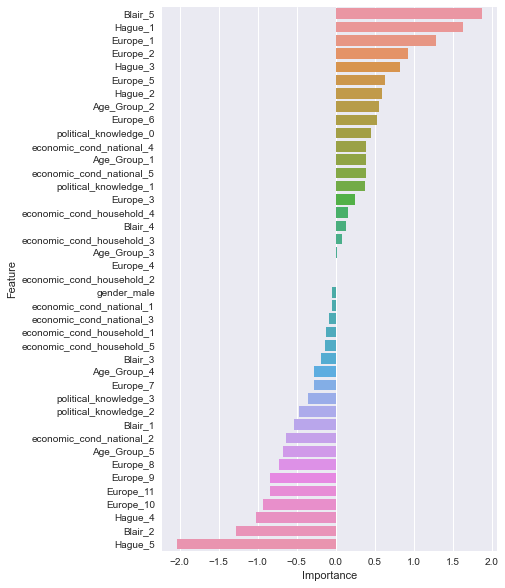

In [504]:
feature_rank = pd.DataFrame({'Feature' : X_train.columns,'Importance' : logit_model.coef_[0]})
feature_rank = feature_rank.sort_values('Importance', ascending=False )
plt.figure(figsize=(6,10))
sns.barplot(y='Feature', x='Importance', data=feature_rank);

In [505]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix

In [509]:
def performance_matrices(model, X_data, y_data, y_predicted):
    accuracy = round(model.score(X_data,y_data),2)
    metrics=classification_report(y_data, y_predicted,output_dict=True)
    met_df=pd.DataFrame(metrics).transpose()
    # Keeping the performance matrices of minority class
    precision=round(met_df.loc["0"][0],2)
    recall=round(met_df.loc["0"][1],2)
    f1=round(met_df.loc["0"][2],2)
    return (met_df, accuracy,precision,recall,f1);

In [510]:
def performance_matrices_maj(model, X_data, y_data, y_predicted): #will be used for final comparison
    accuracy = round(model.score(X_data,y_data),2)
    metrics=classification_report(y_data, y_predicted,output_dict=True)
    met_df=pd.DataFrame(metrics).transpose()
    # Keeping the performance matrices of MAJORITY class
    precision=round(met_df.loc["1"][0],2)
    recall=round(met_df.loc["1"][1],2)
    f1=round(met_df.loc["1"][2],2)
    return (met_df, accuracy,precision,recall,f1);

In [511]:
logit_train_met1,logit_train_accu, logit_train_precision, logit_train_recall, logit_train_f1 = performance_matrices(logit_model, X_train, y_train, ytrain_predict)
logit_train_met_maj1,logit_train_accu_maj, logit_train_precision_maj, logit_train_recall_maj, logit_train_f1_maj = performance_matrices_maj(logit_model, X_train, y_train, ytrain_predict)
print ('logit_train_accu ',logit_train_accu)
print ('logit_train_precision ',logit_train_precision)
print ('logit_train_recall ',logit_train_recall)
print ('logit_train_f1 ',logit_train_f1)

logit_train_accu  0.84
logit_train_precision  0.77
logit_train_recall  0.7
logit_train_f1  0.73


In [512]:
logit_train_met1

,precision,recall,f1-score,support
0,0.770270,0.699387,0.733119,326.000000
1,0.872892,0.908232,0.890212,741.000000
accuracy,0.844424,0.844424,0.844424,0.844424
macro avg,0.821581,0.803809,0.811665,1067.000000
weighted avg,0.841538,0.844424,0.842215,1067.000000


In [513]:
def draw_cm(actual, predicted, title):
    cm = confusion_matrix(actual, predicted, [0,1])
    plt.subplots(figsize=(4,3))
    ax = sns.heatmap(cm, cmap = 'Paired', annot=True, fmt='.0f',annot_kws={"fontsize":12},
              xticklabels = ["Conservative", "Labour"],
              yticklabels = ["Conservative", "Labour"],
                    cbar = False)
    bottom, top = ax.get_ylim()
    ax.set_ylim (bottom + 0.5, top - 0.5)
    plt.yticks(rotation=0)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title(title)
    plt.show()

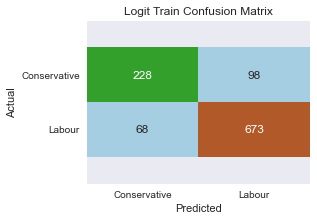

In [514]:
draw_cm(y_train,ytrain_predict,"Logit Train Confusion Matrix")

In [515]:
def draw_auc_roc(model, X_data, y_data, line_color, title):
    probs = model.predict_proba(X_data)
    probs = probs[:, 1]
    model_auc = roc_auc_score(y_data, probs)
    model_fpr, model_tpr, thresholds = roc_curve(y_data, probs)
    plt.figure(figsize=(6,4))
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.plot(model_fpr, model_tpr, color = line_color, label = 'ROC Curve (AUC: %0.2f)'%model_auc)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    # show the plot
    plt.show()
    return model_auc, model_fpr, model_tpr;

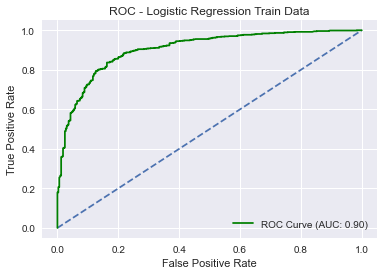

logit_train_auc 0.9042704685261997


In [516]:
logit_train_auc1, logit_train_fpr, logit_train_tpr = draw_auc_roc(logit_model, X_train, y_train, 'green', 'ROC - Logistic Regression Train Data')

print('logit_train_auc', logit_train_auc1)

In [517]:
logit_test_met1,logit_test_accu, logit_test_precision, logit_test_recall, logit_test_f1 = performance_matrices(logit_model, X_test, y_test, ytest_predict)
logit_test_met_maj1,logit_test_accu_maj, logit_test_precision_maj, logit_test_recall_maj, logit_test_f1_maj = performance_matrices_maj(logit_model, X_test, y_test, ytest_predict)
print ('logit_test_accu ',logit_test_accu)
print ('logit_test_precision ',logit_test_precision)
print ('logit_test_recall ',logit_test_recall)
print ('logit_test_f1 ',logit_test_f1)

logit_test_accu  0.82
logit_test_precision  0.7
logit_test_recall  0.68
logit_test_f1  0.69


In [518]:
logit_test_met1

,precision,recall,f1-score,support
0,0.699248,0.683824,0.691450,136.000000
1,0.867692,0.875776,0.871716,322.000000
accuracy,0.818777,0.818777,0.818777,0.818777
macro avg,0.783470,0.779800,0.781583,458.000000
weighted avg,0.817674,0.818777,0.818187,458.000000


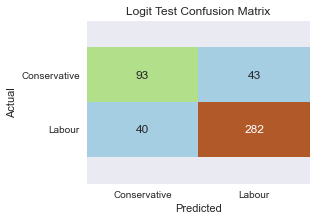

In [519]:
draw_cm(y_test,ytest_predict,"Logit Test Confusion Matrix")

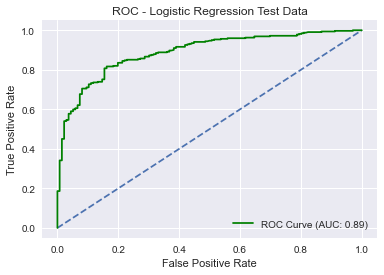

logit_test_auc 0.8888495615637558


In [520]:
logit_test_auc1, logit_test_fpr, logit_test_tpr = draw_auc_roc(logit_model, X_test, y_test, 'green', 'ROC - Logistic Regression Test Data')
print('logit_test_auc', logit_test_auc1)

### LDA Model

In [521]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
LDA_model=clf.fit(X_train,y_train)
LDA_model

LinearDiscriminantAnalysis()

In [522]:
ytrain_predict = LDA_model.predict(X_train)
ytest_predict = LDA_model.predict(X_test)

In [523]:
ytest_predict_prob=logit_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head(10)

,0,1
0,0.689900,0.310100
1,0.015055,0.984945
2,0.580149,0.419851
3,0.463840,0.536160
4,0.015734,0.984266
5,0.025115,0.974885
6,0.269272,0.730728
7,0.004114,0.995886
8,0.721323,0.278677
9,0.525454,0.474546


In [524]:
LDA_train_met1,LDA_train_accu,LDA_train_precision,LDA_train_recall,LDA_train_f1 = performance_matrices(LDA_model, X_train, y_train, ytrain_predict)
LDA_train_met_maj1,LDA_train_accu_maj,LDA_train_precision_maj,LDA_train_recall_maj,LDA_train_f1_maj = performance_matrices_maj(LDA_model, X_train, y_train, ytrain_predict)
print ('LDA_train_accu ',LDA_train_accu)
print ('LDA_train_precision ',LDA_train_precision)
print ('LDA_train_recall ',LDA_train_recall)
print ('LDA_train_f1 ',LDA_train_f1)

LDA_train_accu  0.85
LDA_train_precision  0.77
LDA_train_recall  0.72
LDA_train_f1  0.75


In [525]:
LDA_train_met1

,precision,recall,f1-score,support
0,0.768730,0.723926,0.745656,326.00000
1,0.881579,0.904184,0.892738,741.00000
accuracy,0.849110,0.849110,0.849110,0.84911
macro avg,0.825154,0.814055,0.819197,1067.00000
weighted avg,0.847100,0.849110,0.847800,1067.00000


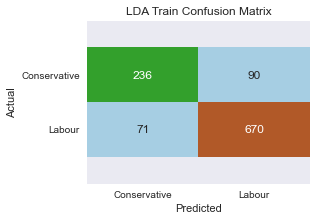

In [526]:
draw_cm(y_train,ytrain_predict,"LDA Train Confusion Matrix")

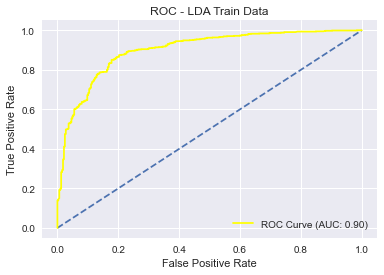

LDA_train_auc 0.8994808872109487


In [527]:
LDA_train_auc1, LDA_train_fpr, LDA_train_tpr = draw_auc_roc(LDA_model, X_train, y_train, 'yellow', 'ROC - LDA Train Data')
print('LDA_train_auc', LDA_train_auc1)

In [528]:
LDA_test_met1,LDA_test_accu,LDA_test_precision,LDA_test_recall,LDA_test_f1 = performance_matrices(LDA_model, X_test, y_test, ytest_predict)
LDA_test_met_maj1,LDA_test_accu_maj,LDA_test_precision_maj,LDA_test_recall_maj,LDA_test_f1_maj = performance_matrices_maj(LDA_model, X_test, y_test, ytest_predict)
print ('LDA_test_accu ',LDA_test_accu)
print ('LDA_test_precision ',LDA_test_precision)
print ('LDA_test_recall ',LDA_test_recall)
print ('LDA_test_f1 ',LDA_test_f1)

LDA_test_accu  0.82
LDA_test_precision  0.68
LDA_test_recall  0.71
LDA_test_f1  0.7


In [529]:
LDA_test_met1

,precision,recall,f1-score,support
0,0.683099,0.713235,0.697842,136.000000
1,0.876582,0.860248,0.868339,322.000000
accuracy,0.816594,0.816594,0.816594,0.816594
macro avg,0.779840,0.786742,0.783090,458.000000
weighted avg,0.819129,0.816594,0.817711,458.000000


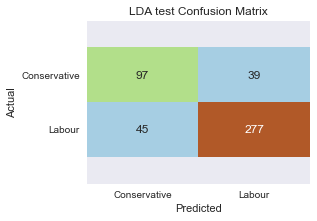

In [530]:
draw_cm(y_test,ytest_predict,"LDA test Confusion Matrix")

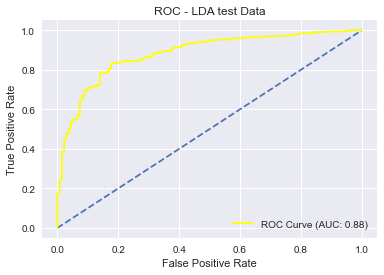

LDA_test_auc 0.882775392765802


In [531]:
LDA_test_auc1, LDA_test_fpr, LDA_test_tpr = draw_auc_roc(LDA_model, X_test, y_test, 'yellow', 'ROC - LDA test Data')
print('LDA_test_auc', LDA_test_auc1)

### KNN Model

In [532]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train,y_train)

KNeighborsClassifier()

In [533]:
ytrain_predict = KNN_model.predict(X_train)
ytest_predict = KNN_model.predict(X_test)

In [534]:
KNN_train_met1,KNN_train_accu,KNN_train_precision,KNN_train_recall,KNN_train_f1 = performance_matrices(KNN_model, X_train, y_train, ytrain_predict)
KNN_train_met_maj1,KNN_train_accu_maj,KNN_train_precision_maj,KNN_train_recall_maj,KNN_train_f1_maj = performance_matrices_maj(KNN_model, X_train, y_train, ytrain_predict)
print ('KNN_train_accu ',KNN_train_accu)
print ('KNN_train_precision ',KNN_train_precision)
print ('KNN_train_recall ',KNN_train_recall)
print ('KNN_train_f1 ',KNN_train_f1)

KNN_train_accu  0.87
KNN_train_precision  0.8
KNN_train_recall  0.75
KNN_train_f1  0.77


In [535]:
KNN_train_met1

,precision,recall,f1-score,support
0,0.798046,0.751534,0.774092,326.000000
1,0.893421,0.916329,0.904730,741.000000
accuracy,0.865979,0.865979,0.865979,0.865979
macro avg,0.845733,0.833932,0.839411,1067.000000
weighted avg,0.864281,0.865979,0.864816,1067.000000


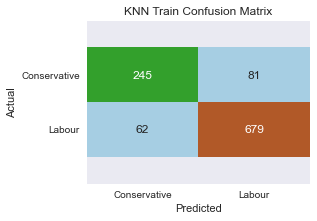

In [536]:
draw_cm(y_train,ytrain_predict,"KNN Train Confusion Matrix")

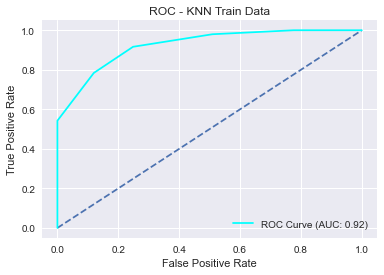

KNN_train_auc 0.9241718619342126


In [537]:
KNN_train_auc1, KNN_train_fpr, KNN_train_tpr = draw_auc_roc(KNN_model, X_train, y_train, 'cyan', 'ROC - KNN Train Data')
print('KNN_train_auc', KNN_train_auc1)

In [538]:
KNN_test_met1,KNN_test_accu,KNN_test_precision,KNN_test_recall,KNN_test_f1 = performance_matrices(KNN_model, X_test, y_test, ytest_predict)
KNN_test_met_maj1,KNN_test_accu_maj,KNN_test_precision_maj,KNN_test_recall_maj,KNN_test_f1_maj = performance_matrices_maj(KNN_model, X_test, y_test, ytest_predict)
print ('KNN_test_accu ',KNN_test_accu)
print ('KNN_test_precision ',KNN_test_precision)
print ('KNN_test_recall ',KNN_test_recall)
print ('KNN_test_f1 ',KNN_test_f1)

KNN_test_accu  0.79
KNN_test_precision  0.65
KNN_test_recall  0.62
KNN_test_f1  0.63


In [539]:
KNN_test_met1

,precision,recall,f1-score,support
0,0.651163,0.617647,0.633962,136.00000
1,0.841945,0.860248,0.850998,322.00000
accuracy,0.788210,0.788210,0.788210,0.78821
macro avg,0.746554,0.738948,0.742480,458.00000
weighted avg,0.785294,0.788210,0.786551,458.00000


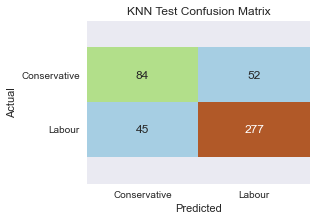

In [540]:
draw_cm(y_test,ytest_predict,"KNN Test Confusion Matrix")

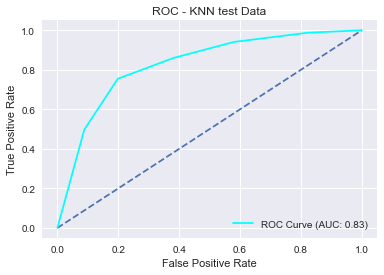

KNN_test_auc 0.8275255754475703


In [541]:
KNN_test_auc1, KNN_test_fpr, KNN_test_tpr = draw_auc_roc(KNN_model, X_test, y_test, 'cyan', 'ROC - KNN test Data')
print('KNN_test_auc', KNN_test_auc1)

### Naive Bayes Model

Choosing Multinomial Naive Bayes as the data is multinomial in nature

In [542]:
from sklearn.naive_bayes import MultinomialNB
MNB_model = MultinomialNB()
MNB_model.fit(X_train, y_train)

MultinomialNB()

In [543]:
ytrain_predict = MNB_model.predict(X_train)
ytest_predict = MNB_model.predict(X_test)

In [544]:
ytest_predict_prob=logit_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).sample(10)

,0,1
35,0.835208,0.164792
335,0.968165,0.031835
16,0.801727,0.198273
260,0.929230,0.070770
447,0.095340,0.904660
310,0.029035,0.970965
395,0.084160,0.915840
326,0.579172,0.420828
227,0.050440,0.949560
171,0.932719,0.067281


In [545]:
MNB_train_met1,MNB_train_accu,MNB_train_precision,MNB_train_recall,MNB_train_f1 = performance_matrices(MNB_model, X_train, y_train, ytrain_predict)
MNB_train_met_maj1,MNB_train_accu_maj,MNB_train_precision_maj,MNB_train_recall_maj,MNB_train_f1_maj = performance_matrices_maj(MNB_model, X_train, y_train, ytrain_predict)
print ('MNB_train_accu ',MNB_train_accu)
print ('MNB_train_precision ',MNB_train_precision)
print ('MNB_train_recall ',MNB_train_recall)
print ('MNB_train_f1 ',MNB_train_f1)

MNB_train_accu  0.84
MNB_train_precision  0.74
MNB_train_recall  0.73
MNB_train_f1  0.73


In [546]:
MNB_train_met1

,precision,recall,f1-score,support
0,0.740625,0.726994,0.733746,326.0000
1,0.880857,0.887989,0.884409,741.0000
accuracy,0.838800,0.838800,0.838800,0.8388
macro avg,0.810741,0.807492,0.809077,1067.0000
weighted avg,0.838012,0.838800,0.838377,1067.0000


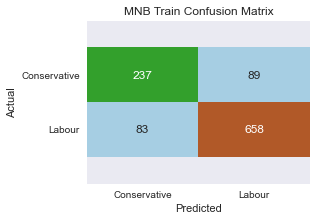

In [547]:
draw_cm(y_train,ytrain_predict,"MNB Train Confusion Matrix")

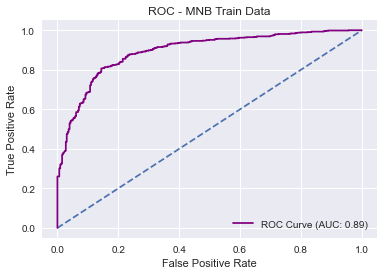

MNB_train_auc 0.8934287109940968


In [548]:
MNB_train_auc1, MNB_train_fpr, MNB_train_tpr = draw_auc_roc(MNB_model, X_train, y_train, 'purple', 'ROC - MNB Train Data')
print('MNB_train_auc', MNB_train_auc1)

In [549]:
MNB_test_met1,MNB_test_accu,MNB_test_precision,MNB_test_recall,MNB_test_f1 = performance_matrices(MNB_model, X_test, y_test, ytest_predict)
MNB_test_met_maj1,MNB_test_accu_maj,MNB_test_precision_maj,MNB_test_recall_maj,MNB_test_f1_maj = performance_matrices_maj(MNB_model, X_test, y_test, ytest_predict)
print ('MNB_test_accu ',MNB_test_accu)
print ('MNB_test_precision ',MNB_test_precision)
print ('MNB_test_recall ',MNB_test_recall)
print ('MNB_test_f1 ',MNB_test_f1)

MNB_test_accu  0.83
MNB_test_precision  0.71
MNB_test_recall  0.74
MNB_test_f1  0.72


In [551]:
MNB_test_met1

,precision,recall,f1-score,support
0,0.706294,0.742647,0.724014,136.000000
1,0.888889,0.869565,0.879121,322.000000
accuracy,0.831878,0.831878,0.831878,0.831878
macro avg,0.797591,0.806106,0.801568,458.000000
weighted avg,0.834668,0.831878,0.833063,458.000000


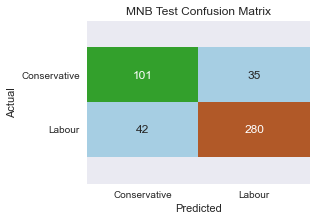

In [552]:
draw_cm(y_test,ytest_predict,"MNB Test Confusion Matrix")

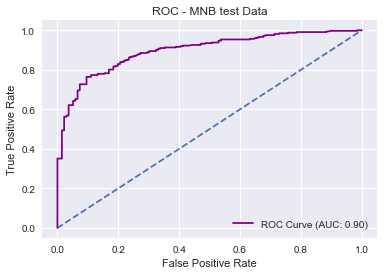

MNB_test_auc 0.8970474059188892


In [553]:
MNB_test_auc1, MNB_test_fpr, MNB_test_tpr = draw_auc_roc(MNB_model, X_test, y_test, 'purple', 'ROC - MNB test Data')
print('MNB_test_auc', MNB_test_auc1)

### Model Tuning

In [554]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

In [555]:
print('Before SMOTE: ',X_train.shape)
print('After SMOTE: ',X_train_res.shape)

Before SMOTE:  (1067, 41)
After SMOTE:  (1482, 41)


### Logit with SMOTE

In [556]:
logit_res_model = LogisticRegression()
logit_res_model.fit(X_train_res, y_train_res)

LogisticRegression()

In [557]:
ytrain_predict = logit_res_model.predict(X_train_res)
ytest_predict = logit_res_model.predict(X_test)

In [558]:
logit_test_met2,logit_res_test_accu,logit_res_test_precision,logit_res_test_recall,logit_res_test_f1 = performance_matrices(logit_res_model, X_test, y_test, ytest_predict)
print ('logit_res_test_accu ',logit_res_test_accu)
print ('logit_res_test_precision ',logit_res_test_precision)
print ('logit_res_test_recall ',logit_res_test_recall)
print ('logit_res_test_f1 ',logit_res_test_f1)

logit_res_test_accu  0.82
logit_res_test_precision  0.69
logit_res_test_recall  0.71
logit_res_test_f1  0.7


In [559]:
logit_test_met2

,precision,recall,f1-score,support
0,0.690647,0.705882,0.698182,136.000000
1,0.874608,0.866460,0.870515,322.000000
accuracy,0.818777,0.818777,0.818777,0.818777
macro avg,0.782628,0.786171,0.784348,458.000000
weighted avg,0.819982,0.818777,0.819342,458.000000


In [560]:
logit_test_met1

,precision,recall,f1-score,support
0,0.699248,0.683824,0.691450,136.000000
1,0.867692,0.875776,0.871716,322.000000
accuracy,0.818777,0.818777,0.818777,0.818777
macro avg,0.783470,0.779800,0.781583,458.000000
weighted avg,0.817674,0.818777,0.818187,458.000000


No significant improvement in test performance

### LDA with SMOTE

In [561]:
LDA_res_model = LinearDiscriminantAnalysis()
LDA_res_model.fit(X_train_res,y_train_res)
#LDA_model

LinearDiscriminantAnalysis()

In [562]:
ytrain_predict = LDA_res_model.predict(X_train_res)
ytest_predict = LDA_res_model.predict(X_test)

In [563]:
LDA_test_met2,LDA_res_test_accu,LDA_res_test_precision,LDA_res_test_recall,LDA_res_test_f1 = performance_matrices(LDA_res_model, X_test, y_test, ytest_predict)
print ('LDA_res_test_accu ',LDA_res_test_accu)
print ('LDA_res_test_precision ',LDA_res_test_precision)
print ('LDA_res_test_recall ',LDA_res_test_recall)
print ('LDA_res_test_f1 ',LDA_res_test_f1)

LDA_res_test_accu  0.7
LDA_res_test_precision  0.0
LDA_res_test_recall  0.0
LDA_res_test_f1  0.0


In [564]:
LDA_test_met2

,precision,recall,f1-score,support
0,0.000000,0.000000,0.000000,136.000000
1,0.703057,1.000000,0.825641,322.000000
accuracy,0.703057,0.703057,0.703057,0.703057
macro avg,0.351528,0.500000,0.412821,458.000000
weighted avg,0.494289,0.703057,0.580473,458.000000


In [565]:
LDA_test_met1

,precision,recall,f1-score,support
0,0.683099,0.713235,0.697842,136.000000
1,0.876582,0.860248,0.868339,322.000000
accuracy,0.816594,0.816594,0.816594,0.816594
macro avg,0.779840,0.786742,0.783090,458.000000
weighted avg,0.819129,0.816594,0.817711,458.000000


No improvement in LDA model

### KNN with SMOTE

In [566]:
KNN_res_model=KNeighborsClassifier()
KNN_res_model.fit(X_train_res,y_train_res)

KNeighborsClassifier()

In [567]:
ytrain_predict = KNN_res_model.predict(X_train_res)
ytest_predict = KNN_res_model.predict(X_test)

In [568]:
KNN_test_met2,KNN_res_test_accu,KNN_res_test_precision,KNN_res_test_recall,KNN_res_test_f1 = performance_matrices(KNN_res_model, X_test, y_test, ytest_predict)
print ('KNN_res_test_accu ',KNN_res_test_accu)
print ('KNN_res_test_precision ',KNN_res_test_precision)
print ('KNN_res_test_recall ',KNN_res_test_recall)
print ('KNN_res_test_f1 ',KNN_res_test_f1)

KNN_res_test_accu  0.8
KNN_res_test_precision  0.67
KNN_res_test_recall  0.63
KNN_res_test_f1  0.65


In [569]:
KNN_test_met2

,precision,recall,f1-score,support
0,0.671875,0.632353,0.651515,136.000000
1,0.848485,0.869565,0.858896,322.000000
accuracy,0.799127,0.799127,0.799127,0.799127
macro avg,0.760180,0.750959,0.755205,458.000000
weighted avg,0.796042,0.799127,0.797315,458.000000


In [570]:
KNN_test_met1

,precision,recall,f1-score,support
0,0.651163,0.617647,0.633962,136.00000
1,0.841945,0.860248,0.850998,322.00000
accuracy,0.788210,0.788210,0.788210,0.78821
macro avg,0.746554,0.738948,0.742480,458.00000
weighted avg,0.785294,0.788210,0.786551,458.00000


Test performance depreciated

### MNB with SMOTE

In [571]:
MNB_res_model = MultinomialNB()
MNB_res_model.fit(X_train_res, y_train_res)

MultinomialNB()

In [572]:
ytrain_predict = MNB_res_model.predict(X_train_res)
ytest_predict = MNB_res_model.predict(X_test)

In [573]:
MNB_test_met2,MNB_res_test_accu,MNB_res_test_precision,MNB_res_test_recall,MNB_res_test_f1 = performance_matrices(MNB_res_model, X_test, y_test, ytest_predict)
print ('MNB_res_test_accu ',MNB_res_test_accu)
print ('MNB_res_test_precision ',MNB_res_test_precision)
print ('MNB_res_test_recall ',MNB_res_test_recall)
print ('MNB_res_test_f1 ',MNB_res_test_f1)

MNB_res_test_accu  0.75
MNB_res_test_precision  0.64
MNB_res_test_recall  0.38
MNB_res_test_f1  0.48


In [574]:
MNB_test_met2

,precision,recall,f1-score,support
0,0.641975,0.382353,0.479263,136.000000
1,0.777188,0.909938,0.838340,322.000000
accuracy,0.753275,0.753275,0.753275,0.753275
macro avg,0.709582,0.646145,0.658802,458.000000
weighted avg,0.737038,0.753275,0.731715,458.000000


In [575]:
MNB_test_met1

,precision,recall,f1-score,support
0,0.706294,0.742647,0.724014,136.000000
1,0.888889,0.869565,0.879121,322.000000
accuracy,0.831878,0.831878,0.831878,0.831878
macro avg,0.797591,0.806106,0.801568,458.000000
weighted avg,0.834668,0.831878,0.833063,458.000000


Test performace depreciated

No improvement in performance metrices could be found using SMOTE. SMOTE is effecttive only if the minority class is 1 to 2%, but here it is 30%

# Hyperparameter tuning using GridsearchCV

### Logistic Regression with GridSearchCV

In [576]:
from sklearn.model_selection import GridSearchCV
class_weight = dict({0:2, 1:1})
clf = LogisticRegression(class_weight = class_weight)
grid_values = {'penalty': [ 'l2', 'none']
               ,'C':np.logspace(-3,3,20)
               ,'solver' : ['newton-cg', 'lbfgs', 'sag' ,'saga' ]
              }
logit_model3 = GridSearchCV(clf, param_grid = grid_values,cv = 10)
#logit_model3 = LogisticRegression(C = 1.438449888287663, penalty = 'l2', solver = 'newton-cg', class_weight = class_weight)
logit_model3.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(class_weight={0: 2, 1: 1}),
             param_grid={'C': array([1.00000000e-03, 2.06913808e-03, 4.28133240e-03, 8.85866790e-03,
       1.83298071e-02, 3.79269019e-02, 7.84759970e-02, 1.62377674e-01,
       3.35981829e-01, 6.95192796e-01, 1.43844989e+00, 2.97635144e+00,
       6.15848211e+00, 1.27427499e+01, 2.63665090e+01, 5.45559478e+01,
       1.12883789e+02, 2.33572147e+02, 4.83293024e+02, 1.00000000e+03]),
                         'penalty': ['l2', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']})

In [577]:
logit_model3.best_estimator_

LogisticRegression(C=0.0379269019073225, class_weight={0: 2, 1: 1},
                   solver='newton-cg')

In [578]:
#feature_rank = pd.DataFrame({'Feature' : X_train.columns,'Importance' : logit_model3.coef_[0]})
#feature_rank = feature_rank.sort_values('Importance', ascending=False )
#plt.figure(figsize=(8,8))
#sns.barplot(y='Feature', x='Importance', data=feature_rank)

In [579]:
#ytrain_predict = logit_model.predict(X_train_res)
ytrain_predict = logit_model3.predict(X_train)
ytest_predict = logit_model3.predict(X_test)

In [580]:
#logit_train_met3,logit_train_accu, logit_train_precision, logit_train_recall, logit_train_f1 = performance_matrices(logit_model3, X_train_res, y_train_res, ytrain_predict)
logit_train_met3,logit_train_accu3, logit_train_precision3, logit_train_recall3, logit_train_f13 = performance_matrices(logit_model3, X_train, y_train, ytrain_predict)
logit_train_met_maj3,logit_train_accu_maj3, logit_train_precision_maj3, logit_train_recall_maj3, logit_train_f1_maj3 = performance_matrices_maj(logit_model3, X_train, y_train, ytrain_predict)
print ('logit_train_accu ',logit_train_accu3)
print ('logit_train_precision ',logit_train_precision3)
print ('logit_train_recall ',logit_train_recall3)
print ('logit_train_f1 ',logit_train_f13)

logit_train_accu  0.84
logit_train_precision  0.71
logit_train_recall  0.8
logit_train_f1  0.76


In [581]:
logit_train_met3

,precision,recall,f1-score,support
0,0.711957,0.803681,0.755043,326.000000
1,0.908441,0.856950,0.881944,741.000000
accuracy,0.840675,0.840675,0.840675,0.840675
macro avg,0.810199,0.830316,0.818494,1067.000000
weighted avg,0.848409,0.840675,0.843172,1067.000000


In [582]:
logit_train_met1 #to compare with 1st iteration

,precision,recall,f1-score,support
0,0.770270,0.699387,0.733119,326.000000
1,0.872892,0.908232,0.890212,741.000000
accuracy,0.844424,0.844424,0.844424,0.844424
macro avg,0.821581,0.803809,0.811665,1067.000000
weighted avg,0.841538,0.844424,0.842215,1067.000000


In [583]:
logit_test_met3,logit_test_accu3, logit_test_precision3, logit_test_recall3, logit_test_f13 = performance_matrices(logit_model3, X_test, y_test, ytest_predict)
logit_test_met_maj3,logit_test_accu_maj3, logit_test_precision_maj3, logit_test_recall_maj3, logit_test_f1_maj3 = performance_matrices_maj(logit_model3, X_test, y_test, ytest_predict)
print ('logit_test_accu ',logit_test_accu)
print ('logit_test_precision ',logit_test_precision)
print ('logit_test_recall ',logit_test_recall)
print ('logit_test_f1 ',logit_test_f1)

logit_test_accu  0.82
logit_test_precision  0.7
logit_test_recall  0.68
logit_test_f1  0.69


In [584]:
logit_test_met3

,precision,recall,f1-score,support
0,0.644970,0.801471,0.714754,136.000000
1,0.906574,0.813665,0.857610,322.000000
accuracy,0.810044,0.810044,0.810044,0.810044
macro avg,0.775772,0.807568,0.786182,458.000000
weighted avg,0.828893,0.810044,0.815190,458.000000


In [585]:
logit_test_met1

,precision,recall,f1-score,support
0,0.699248,0.683824,0.691450,136.000000
1,0.867692,0.875776,0.871716,322.000000
accuracy,0.818777,0.818777,0.818777,0.818777
macro avg,0.783470,0.779800,0.781583,458.000000
weighted avg,0.817674,0.818777,0.818187,458.000000


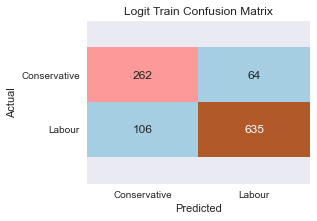

In [586]:
#draw_cm(y_train_res,ytrain_predict,"Logit Train Confusion Matrix")
draw_cm(y_train,ytrain_predict,"Logit Train Confusion Matrix")

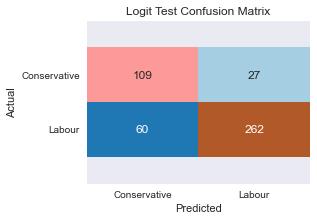

In [587]:
draw_cm(y_test,ytest_predict,"Logit Test Confusion Matrix")

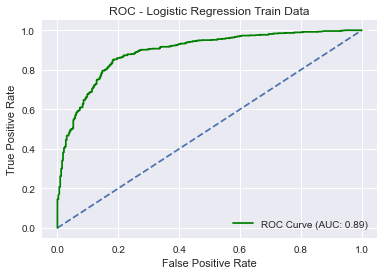

logit_train_auc 0.892145417815421


In [588]:
#logit_train_auc3, logit_train_fpr, logit_train_tpr = draw_auc_roc(logit_model, X_train_res, y_train_res, 'g', 'ROC - Logistic Regression Train Data')
logit_train_auc3, logit_train_fpr, logit_train_tpr = draw_auc_roc(logit_model3, X_train, y_train, 'green', 'ROC - Logistic Regression Train Data')
print('logit_train_auc', logit_train_auc3)

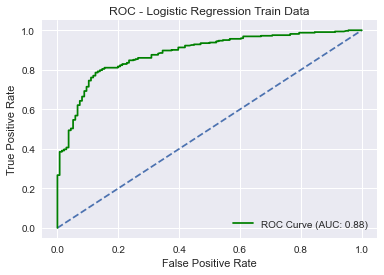

logit_test_auc 0.8848305626598465


In [589]:
logit_test_auc3, logit_test_fpr, logit_test_tpr = draw_auc_roc(logit_model3, X_test, y_test, 'green', 'ROC - Logistic Regression Train Data')
print('logit_test_auc', logit_test_auc3)

In [590]:
print('1st Iteration: logit_test_auc', logit_test_auc1)

1st Iteration: logit_test_auc 0.8888495615637558


Taking this iteration as Logit final model

### Linear Discriminant Analysis with GridsearchCV

In [591]:
clf = LinearDiscriminantAnalysis()
grid_values = {'solver': ['svd', 'lsqr', 'eigen'],
               'tol': [0.0001, 0.001, 0.01]
              }
LDA_model3 = GridSearchCV(clf, param_grid = grid_values, cv = 3)
LDA_model3.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LinearDiscriminantAnalysis(),
             param_grid={'solver': ['svd', 'lsqr', 'eigen'],
                         'tol': [0.0001, 0.001, 0.01]})

In [592]:
LDA_model3.best_params_

{'solver': 'svd', 'tol': 0.0001}

In [593]:
#ytrain_predict = LDA_model3.predict(X_train_res)
ytrain_predict = LDA_model3.predict(X_train)
ytest_predict = LDA_model3.predict(X_test)

In [594]:
#LDA_met,LDA_train_accu,LDA_train_precision,LDA_train_recall,LDA_train_f1 = performance_matrices(LDA_model, X_train_res, y_train_res, ytrain_predict)
LDA_train_met3,LDA_train_accu3,LDA_train_precision3,LDA_train_recall3,LDA_train_f13 = performance_matrices(LDA_model3, X_train, y_train, ytrain_predict)
print ('LDA_train_accu ',LDA_train_accu3)
print ('LDA_train_precision ',LDA_train_precision3)
print ('LDA_train_recall ',LDA_train_recall3)
print ('LDA_train_f1 ',LDA_train_f13)

LDA_train_accu  0.85
LDA_train_precision  0.77
LDA_train_recall  0.72
LDA_train_f1  0.75


In [595]:
LDA_train_met3

,precision,recall,f1-score,support
0,0.768730,0.723926,0.745656,326.00000
1,0.881579,0.904184,0.892738,741.00000
accuracy,0.849110,0.849110,0.849110,0.84911
macro avg,0.825154,0.814055,0.819197,1067.00000
weighted avg,0.847100,0.849110,0.847800,1067.00000


In [596]:
LDA_train_met1

,precision,recall,f1-score,support
0,0.768730,0.723926,0.745656,326.00000
1,0.881579,0.904184,0.892738,741.00000
accuracy,0.849110,0.849110,0.849110,0.84911
macro avg,0.825154,0.814055,0.819197,1067.00000
weighted avg,0.847100,0.849110,0.847800,1067.00000


In [597]:
LDA_test_met3,LDA_test_accu3,LDA_test_precision3,LDA_test_recall3,LDA_test_f13 = performance_matrices(LDA_model3, X_test, y_test, ytest_predict)
print ('LDA_test_accu ',LDA_test_accu3)
print ('LDA_test_precision ',LDA_test_precision3)
print ('LDA_test_recall ',LDA_test_recall3)
print ('LDA_test_f1 ',LDA_test_f13)

LDA_test_accu  0.82
LDA_test_precision  0.68
LDA_test_recall  0.71
LDA_test_f1  0.7


In [598]:
LDA_test_met3

,precision,recall,f1-score,support
0,0.683099,0.713235,0.697842,136.000000
1,0.876582,0.860248,0.868339,322.000000
accuracy,0.816594,0.816594,0.816594,0.816594
macro avg,0.779840,0.786742,0.783090,458.000000
weighted avg,0.819129,0.816594,0.817711,458.000000


In [599]:
LDA_test_met1

,precision,recall,f1-score,support
0,0.683099,0.713235,0.697842,136.000000
1,0.876582,0.860248,0.868339,322.000000
accuracy,0.816594,0.816594,0.816594,0.816594
macro avg,0.779840,0.786742,0.783090,458.000000
weighted avg,0.819129,0.816594,0.817711,458.000000


Both models found to be same

### KNN Model with GridsearchCV

In [600]:
clf = KNeighborsClassifier()
grid_values = {'n_neighbors': range(5,20),
               'weights' : ['uniform'],  #['uniform','distance'],
               'metric': ['minkowski', 'euclidean', 'canberra']
              }
KNN_model3 = GridSearchCV(clf, param_grid = grid_values, cv = 5)
KNN_model3.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'euclidean', 'canberra'],
                         'n_neighbors': range(5, 20), 'weights': ['uniform']})

In [601]:
KNN_model3.best_params_

{'metric': 'minkowski', 'n_neighbors': 19, 'weights': 'uniform'}

In [602]:
#ytrain_predict = KNN_model3.predict(X_train_res)
ytrain_predict = KNN_model3.predict(X_train)
ytest_predict = KNN_model3.predict(X_test)

In [603]:
KNN_train_met3,KNN_train_accu3,KNN_train_precision3,KNN_train_recall3,KNN_train_f13 = performance_matrices(KNN_model3, X_train, y_train, ytrain_predict)
KNN_train_met_maj3,KNN_train_accu_maj3,KNN_train_precision_maj3,KNN_train_recall_maj3,KNN_train_f1_maj3 = performance_matrices_maj(KNN_model3, X_train, y_train, ytrain_predict)
print ('KNN_train_accu ',KNN_train_accu3) 
print ('KNN_train_precision ',KNN_train_precision3)
print ('KNN_train_recall ',KNN_train_recall3)
print ('KNN_train_f1 ',KNN_train_f13)

KNN_train_accu  0.83
KNN_train_precision  0.8
KNN_train_recall  0.6
KNN_train_f1  0.68


In [604]:
KNN_train_met3

,precision,recall,f1-score,support
0,0.801653,0.595092,0.683099,326.000000
1,0.840000,0.935223,0.885057,741.000000
accuracy,0.831303,0.831303,0.831303,0.831303
macro avg,0.820826,0.765157,0.784078,1067.000000
weighted avg,0.828284,0.831303,0.823353,1067.000000


In [605]:
KNN_train_met1

,precision,recall,f1-score,support
0,0.798046,0.751534,0.774092,326.000000
1,0.893421,0.916329,0.904730,741.000000
accuracy,0.865979,0.865979,0.865979,0.865979
macro avg,0.845733,0.833932,0.839411,1067.000000
weighted avg,0.864281,0.865979,0.864816,1067.000000


In [606]:
KNN_test_met3,KNN_test_accu3,KNN_test_precision3,KNN_test_recall3,KNN_test_f13 = performance_matrices(KNN_model3, X_test, y_test, ytest_predict)
KNN_test_met_maj3,KNN_test_accu_maj3,KNN_test_precision_maj3,KNN_test_recall_maj3,KNN_test_f1_maj3 = performance_matrices_maj(KNN_model3, X_test, y_test, ytest_predict)
print ('KNN_test_accu ',KNN_test_accu3)
print ('KNN_test_precision ',KNN_test_precision3)
print ('KNN_test_recall ',KNN_test_recall3)
print ('KNN_test_f1 ',KNN_test_f13)

KNN_test_accu  0.81
KNN_test_precision  0.72
KNN_test_recall  0.6
KNN_test_f1  0.66


In [607]:
KNN_test_met3

,precision,recall,f1-score,support
0,0.719298,0.602941,0.656000,136.000000
1,0.843023,0.900621,0.870871,322.000000
accuracy,0.812227,0.812227,0.812227,0.812227
macro avg,0.781161,0.751781,0.763435,458.000000
weighted avg,0.806284,0.812227,0.807066,458.000000


In [608]:
KNN_test_met1

,precision,recall,f1-score,support
0,0.651163,0.617647,0.633962,136.00000
1,0.841945,0.860248,0.850998,322.00000
accuracy,0.788210,0.788210,0.788210,0.78821
macro avg,0.746554,0.738948,0.742480,458.00000
weighted avg,0.785294,0.788210,0.786551,458.00000


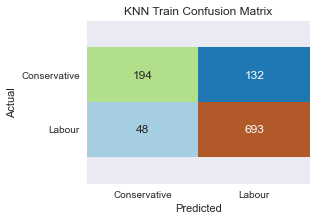

In [609]:
draw_cm(y_train,ytrain_predict,"KNN Train Confusion Matrix")

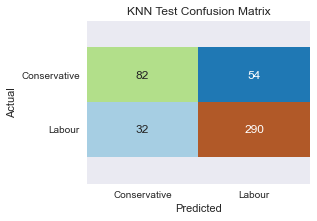

In [610]:
draw_cm(y_test,ytest_predict,"KNN Test Confusion Matrix")

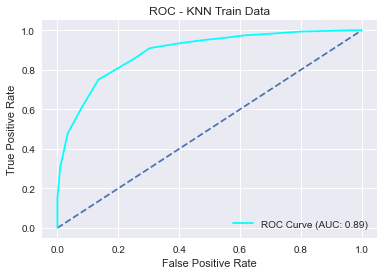

KNN_train_auc 0.889229030575495


In [611]:
KNN_train_auc3, KNN_train_fpr, KNN_train_tpr = draw_auc_roc(KNN_model3, X_train, y_train, 'cyan', 'ROC - KNN Train Data')
print('KNN_train_auc', KNN_train_auc3)

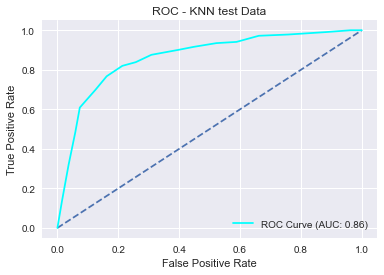

KNN_test_auc 0.8641418523931312


In [612]:
KNN_test_auc3, KNN_test_fpr, KNN_test_tpr = draw_auc_roc(KNN_model3, X_test, y_test, 'cyan', 'ROC - KNN test Data')
print('KNN_test_auc', KNN_test_auc3)

Found to be overfitting, and the recall rate of minority class dropped

### Bagging using RandomForest

In [613]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
class_weight = dict({0:4, 1:1.5})
rfcl = RandomForestClassifier(class_weight=class_weight, 
                              min_samples_leaf=2,
                              min_samples_split=4)
Bagging_model=BaggingClassifier(base_estimator=rfcl,n_estimators=50,random_state=1)
Bagging_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(class_weight={0: 4,
                                                                      1: 1.5},
                                                        min_samples_leaf=2,
                                                        min_samples_split=4),
                  n_estimators=50, random_state=1)

In [614]:
#ytrain_predict = Bagging_model.predict(X_train_res)
ytrain_predict = Bagging_model.predict(X_train)
ytest_predict = Bagging_model.predict(X_test)

In [615]:
#Bagging_met,Bagging_train_accu,Bagging_train_precision,Bagging_train_recall,Bagging_train_f1 = performance_matrices(Bagging_model, X_train_res, y_train_res, ytrain_predict)
Bagging_met,Bagging_train_accu,Bagging_train_precision,Bagging_train_recall,Bagging_train_f1 = performance_matrices(Bagging_model, X_train, y_train, ytrain_predict)
Bagging_met_maj,Bagging_train_accu_maj,Bagging_train_precision_maj,Bagging_train_recall_maj,Bagging_train_f1_maj = performance_matrices_maj(Bagging_model, X_train, y_train, ytrain_predict)
print ('Bagging_train_accu ',Bagging_train_accu)
print ('Bagging_train_precision ',Bagging_train_precision)
print ('Bagging_train_recall ',Bagging_train_recall)
print ('Bagging_train_f1 ',Bagging_train_f1)

Bagging_train_accu  0.89
Bagging_train_precision  0.8
Bagging_train_recall  0.87
Bagging_train_f1  0.83


In [616]:
Bagging_met

,precision,recall,f1-score,support
0,0.801136,0.865031,0.831858,326.000000
1,0.938462,0.905533,0.921703,741.000000
accuracy,0.893158,0.893158,0.893158,0.893158
macro avg,0.869799,0.885282,0.876781,1067.000000
weighted avg,0.896505,0.893158,0.894253,1067.000000


In [617]:
Bagging_met,Bagging_test_accu,Bagging_test_precision,Bagging_test_recall,Bagging_test_f1 = performance_matrices(Bagging_model, X_test, y_test, ytest_predict)
Bagging_met_maj,Bagging_test_accu_maj,Bagging_test_precision_maj,Bagging_test_recall_maj,Bagging_test_f1_maj = performance_matrices_maj(Bagging_model, X_test, y_test, ytest_predict)
print ('Bagging_test_accu ',Bagging_test_accu)
print ('Bagging_test_precision ',Bagging_test_precision)
print ('Bagging_test_recall ',Bagging_test_recall)
print ('Bagging_test_f1 ',Bagging_test_f1)

Bagging_test_accu  0.81
Bagging_test_precision  0.65
Bagging_test_recall  0.79
Bagging_test_f1  0.71


In [227]:
Bagging_met

,precision,recall,f1-score,support
0,0.648485,0.786765,0.710963,136.000000
1,0.901024,0.819876,0.858537,322.000000
accuracy,0.810044,0.810044,0.810044,0.810044
macro avg,0.774754,0.803320,0.784750,458.000000
weighted avg,0.826034,0.810044,0.814716,458.000000


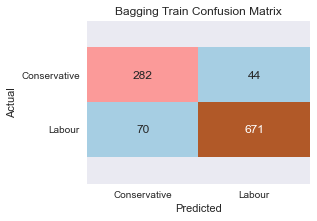

In [618]:
draw_cm(y_train,ytrain_predict,"Bagging Train Confusion Matrix")
#draw_cm(y_train_res,ytrain_predict,"Bagging Train Confusion Matrix")

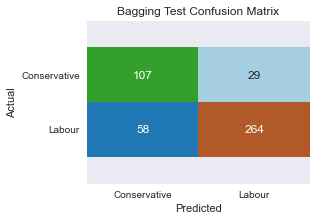

In [619]:
draw_cm(y_test,ytest_predict,"Bagging Test Confusion Matrix")

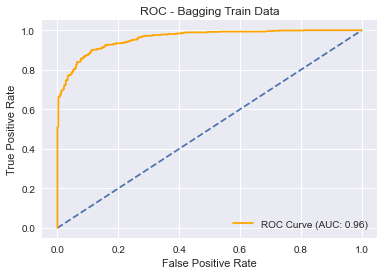

Bagging_train_auc 0.9595762648717121


In [620]:

#Bagging_train_auc, Bagging_train_fpr, Bagging_train_tpr = draw_auc_roc(Bagging_model, X_train_res, y_train_res, 'k', 'ROC - Bagging Train Data')
Bagging_train_auc, Bagging_train_fpr, Bagging_train_tpr = draw_auc_roc(Bagging_model, X_train, y_train, 'orange', 'ROC - Bagging Train Data')
print('Bagging_train_auc', Bagging_train_auc)

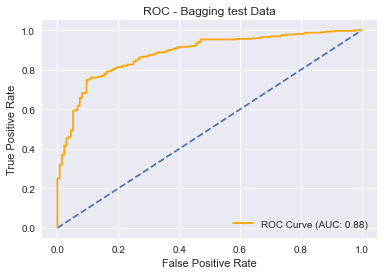

Bagging_test_auc 0.8833462732919255


In [621]:
Bagging_test_auc, Bagging_test_fpr, Bagging_test_tpr = draw_auc_roc(Bagging_model, X_test, y_test, 'orange', 'ROC - Bagging test Data')
print('Bagging_test_auc', Bagging_test_auc)

### Adaptive Boosting

In [623]:
from sklearn.ensemble import AdaBoostClassifier
ADB_model1=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.1,n_estimators=500, random_state=0)
ADB_model1.fit(X_train,y_train)

AdaBoostClassifier(learning_rate=0.1, n_estimators=500, random_state=0)

In [626]:
ytrain_predict = ADB_model1.predict(X_train)
ytest_predict = ADB_model1.predict(X_test)

In [629]:
ADB_met,ADB_train_accu,ADB_train_precision,ADB_train_recall,ADB_train_f1 = performance_matrices(ADB_model1, X_train, y_train, ytrain_predict)
ADB_met_maj,ADB_train_accu_maj,ADB_train_precision_maj,ADB_train_recall_maj,ADB_train_f1_maj = performance_matrices_maj(ADB_model1, X_train, y_train, ytrain_predict)
print ('ADB_train_accu ',ADB_train_accu)
print ('ADB_train_precision ',ADB_train_precision)
print ('ADB_train_recall ',ADB_train_recall)
print ('ADB_train_f1 ',ADB_train_f1)

ADB_train_accu  0.83
ADB_train_precision  0.76
ADB_train_recall  0.67
ADB_train_f1  0.71


In [630]:
ADB_met

,precision,recall,f1-score,support
0,0.756014,0.674847,0.713128,326.000000
1,0.863402,0.904184,0.883322,741.000000
accuracy,0.834114,0.834114,0.834114,0.834114
macro avg,0.809708,0.789515,0.798225,1067.000000
weighted avg,0.830592,0.834114,0.831323,1067.000000


In [631]:
ADB_met,ADB_test_accu,ADB_test_precision,ADB_test_recall,ADB_test_f1 = performance_matrices(ADB_model1, X_test, y_test, ytest_predict)
ADB_met_maj,ADB_test_accu_maj,ADB_test_precision_maj,ADB_test_recall_maj,ADB_test_f1_maj = performance_matrices_maj(ADB_model1, X_test, y_test, ytest_predict)
print ('ADB_test_accu ',ADB_test_accu)
print ('ADB_test_precision ',ADB_test_precision)
print ('ADB_test_recall ',ADB_test_recall)
print ('ADB_test_f1 ',ADB_test_f1)

ADB_test_accu  0.82
ADB_test_precision  0.69
ADB_test_recall  0.71
ADB_test_f1  0.7


In [633]:
ADB_met

,precision,recall,f1-score,support
0,0.690647,0.705882,0.698182,136.000000
1,0.874608,0.866460,0.870515,322.000000
accuracy,0.818777,0.818777,0.818777,0.818777
macro avg,0.782628,0.786171,0.784348,458.000000
weighted avg,0.819982,0.818777,0.819342,458.000000


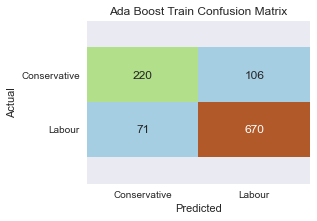

In [634]:
draw_cm(y_train,ytrain_predict,"Ada Boost Train Confusion Matrix")

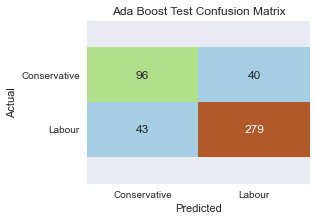

In [635]:
draw_cm(y_test,ytest_predict,"Ada Boost Test Confusion Matrix")

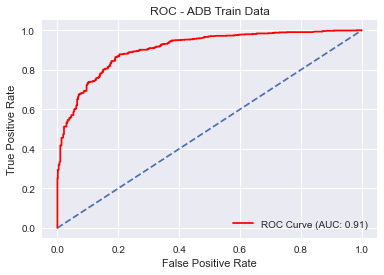

ADB_train_auc 0.9072286238278141


In [638]:
ADB_train_auc, ADB_train_fpr, ADB_train_tpr = draw_auc_roc(ADB_model1, X_train_res, y_train_res, 'red', 'ROC - ADB Train Data')
print('ADB_train_auc', ADB_train_auc)

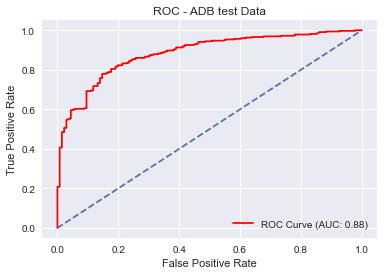

ADB_test_auc 0.8835175374497626


In [639]:
ADB_test_auc, ADB_test_fpr, ADB_test_tpr = draw_auc_roc(ADB_model1, X_test, y_test, 'red', 'ROC - ADB test Data')
print('ADB_test_auc', ADB_test_auc)

Not much improvement

### XGBoost

In [640]:
import xgboost as xgb
XGB_model = xgb.XGBClassifier(max_depth = 5,
                              min_child_weight = 3,
                              learning_rate =0.01,
                              n_estimators=1000)
XGB_model.fit(X_train, y_train)

[08:44:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=5,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [641]:
#ytrain_predict = XGB_model.predict(X_train_res)
ytrain_predict = XGB_model.predict(X_train)
ytest_predict = XGB_model.predict(X_test)

In [642]:
#XGB_met,XGB_train_accu,XGB_train_precision,XGB_train_recall,XGB_train_f1 = performance_matrices(XGB_model, X_train_res, y_train_res, ytrain_predict)
XGB_met,XGB_train_accu,XGB_train_precision,XGB_train_recall,XGB_train_f1 = performance_matrices(XGB_model, X_train, y_train, ytrain_predict)
XGB_met_maj,XGB_train_accu_maj,XGB_train_precision_maj,XGB_train_recall_maj,XGB_train_f1_maj = performance_matrices_maj(XGB_model, X_train, y_train, ytrain_predict)
print ('XGB_train_accu ',XGB_train_accu)
print ('XGB_train_precision ',XGB_train_precision)
print ('XGB_train_recall ',XGB_train_recall)
print ('XGB_train_f1 ',XGB_train_f1)

XGB_train_accu  0.89
XGB_train_precision  0.85
XGB_train_recall  0.77
XGB_train_f1  0.81


In [643]:
XGB_met

,precision,recall,f1-score,support
0,0.850847,0.769939,0.808374,326.000000
1,0.902850,0.940621,0.921348,741.000000
accuracy,0.888472,0.888472,0.888472,0.888472
macro avg,0.876849,0.855280,0.864861,1067.000000
weighted avg,0.886962,0.888472,0.886831,1067.000000


In [644]:
XGB_met,XGB_test_accu,XGB_test_precision,XGB_test_recall,XGB_test_f1 = performance_matrices(XGB_model, X_test, y_test, ytest_predict)
XGB_met_maj,XGB_test_accu_maj,XGB_test_precision_maj,XGB_test_recall_maj,XGB_test_f1_maj = performance_matrices_maj(XGB_model, X_test, y_test, ytest_predict)
print ('XGB_test_accu ',XGB_test_accu)
print ('XGB_test_precision ',XGB_test_precision)
print ('XGB_test_recall ',XGB_test_recall)
print ('XGB_test_f1 ',XGB_test_f1)

XGB_test_accu  0.82
XGB_test_precision  0.7
XGB_test_recall  0.68
XGB_test_f1  0.69


In [645]:
XGB_met

,precision,recall,f1-score,support
0,0.704545,0.683824,0.694030,136.000000
1,0.868098,0.878882,0.873457,322.000000
accuracy,0.820961,0.820961,0.820961,0.820961
macro avg,0.786322,0.781353,0.783743,458.000000
weighted avg,0.819532,0.820961,0.820177,458.000000


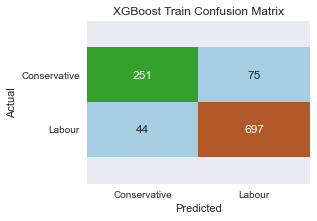

In [646]:
draw_cm(y_train,ytrain_predict,"XGBoost Train Confusion Matrix")
#draw_cm(y_train_res,ytrain_predict,"XGBoost Train Confusion Matrix")

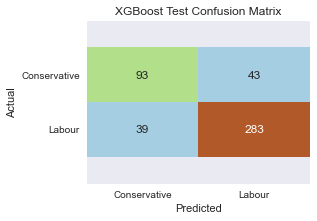

In [647]:
draw_cm(y_test,ytest_predict,"XGBoost Test Confusion Matrix")

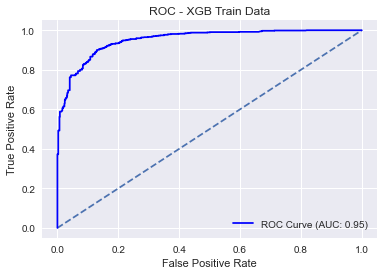

XGB_train_auc 0.9521627956531002


In [648]:
XGB_train_auc, XGB_train_fpr, XGB_train_tpr = draw_auc_roc(XGB_model, X_train_res, y_train_res, 'blue', 'ROC - XGB Train Data')
#XGB_train_auc, XGB_train_fpr, XGB_train_tpr = draw_auc_roc(XGB_model, X_train, y_train, 'b', 'ROC - XGB Train Data')
print('XGB_train_auc', XGB_train_auc)

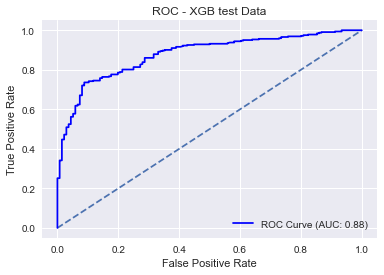

XGB_test_auc 0.877500456704421


In [649]:
XGB_test_auc, XGB_test_fpr, XGB_test_tpr = draw_auc_roc(XGB_model, X_test, y_test, 'blue', 'ROC - XGB test Data')
print('XGB_test_auc', XGB_test_auc)

<AxesSubplot:xlabel='Importance', ylabel='Feature'>

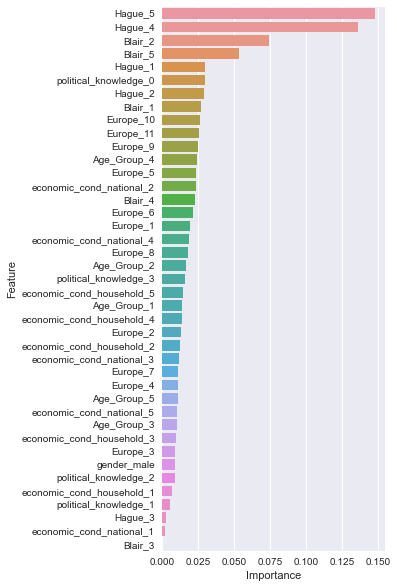

In [650]:
feature_rank = pd.DataFrame({'Feature' : X_train.columns,'Importance' : XGB_model.feature_importances_ })
feature_rank = feature_rank.sort_values('Importance', ascending=False )
plt.figure(figsize=(4,10))
sns.barplot(y='Feature', x='Importance', data=feature_rank)

### Gradient Boosting Classifier

In [651]:
from sklearn.ensemble import GradientBoostingClassifier
GBC_model = GradientBoostingClassifier(n_estimators = 500, max_depth = 10)
#GBC_model.fit(X_train_res, y_train_res)
GBC_model.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=10, n_estimators=500)

In [652]:
#ytrain_predict = GBC_model.predict(X_train_res)
ytrain_predict = GBC_model.predict(X_train)
ytest_predict = GBC_model.predict(X_test)

In [653]:
#GBC_met,GBC_train_accu,GBC_train_precision,GBC_train_recall,GBC_train_f1 = performance_matrices(GBC_model, X_train_res, y_train_res, ytrain_predict)
GBC_met,GBC_train_accu,GBC_train_precision,GBC_train_recall,GBC_train_f1 = performance_matrices(GBC_model, X_train, y_train, ytrain_predict)
print ('GBC_train_accu ',GBC_train_accu)
print ('GBC_train_precision ',GBC_train_precision)
print ('GBC_train_recall ',GBC_train_recall)
print ('GBC_train_f1 ',GBC_train_f1)

GBC_train_accu  0.99
GBC_train_precision  0.98
GBC_train_recall  0.98
GBC_train_f1  0.98


In [654]:
GBC_met,GBC_test_accu,GBC_test_precision,GBC_test_recall,GBC_test_f1 = performance_matrices(GBC_model, X_test, y_test, ytest_predict)
print ('GBC_test_accu ',GBC_test_accu)
print ('GBC_test_precision ',GBC_test_precision)
print ('GBC_test_recall ',GBC_test_recall)
print ('GBC_test_f1 ',GBC_test_f1)

GBC_test_accu  0.78
GBC_test_precision  0.62
GBC_test_recall  0.62
GBC_test_f1  0.62


Found to be highly overfitting - hence dropping from final model selection

### Cross Validation of all final models

In [655]:
from sklearn.model_selection import cross_val_score

Logistic Regression

In [656]:
scores = cross_val_score(logit_model3, X_train, y_train, cv=10)
scores

array([0.81308411, 0.81308411, 0.8411215 , 0.78504673, 0.85981308,
       0.85981308, 0.79439252, 0.83962264, 0.82075472, 0.76415094])

In [657]:
logit_train_CVmean = scores.mean()
logit_train_CVstd = scores.std()
print("Logit Train Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

Logit Train Accuracy: 0.82 (+/- 0.03)


In [658]:
scores = cross_val_score(logit_model3, X_test, y_test, cv=10)
scores

array([0.84782609, 0.80434783, 0.89130435, 0.76086957, 0.82608696,
       0.84782609, 0.7826087 , 0.82608696, 0.75555556, 0.86666667])

In [659]:
logit_test_CVmean = scores.mean()
logit_test_CVstd = scores.std()
print("Logit Test Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

Logit Test Accuracy: 0.82 (+/- 0.04)


LDA

In [660]:
scores = cross_val_score(LDA_model, X_train_res, y_train_res, cv=10)
scores

array([0.5033557 , 0.4966443 , 0.5       , 0.5       , 0.72297297,
       0.92567568, 0.93918919, 0.90540541, 0.93918919, 0.90540541])

In [661]:
LDA_train_CVmean = scores.mean()
LDA_train_CVstd = scores.std()
print("LDA Train Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

LDA Train Accuracy: 0.73 (+/- 0.20)


In [662]:
scores = cross_val_score(LDA_model, X_test, y_test, cv=10)
scores

array([0.84782609, 0.76086957, 0.93478261, 0.76086957, 0.80434783,
       0.86956522, 0.80434783, 0.82608696, 0.77777778, 0.75555556])

In [663]:
LDA_test_CVmean = scores.mean()
LDA_test_CVstd = scores.std()
print("LDA Test Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

LDA Test Accuracy: 0.81 (+/- 0.05)


KNN

In [664]:
scores = cross_val_score(KNN_model3, X_train_res, y_train_res, cv=10)
scores

array([0.79865772, 0.80536913, 0.74324324, 0.7972973 , 0.91216216,
       0.89189189, 0.87162162, 0.89864865, 0.87837838, 0.86486486])

In [665]:
KNN_train_CVmean = scores.mean()
KNN_train_CVstd = scores.std()
print("KNN Train Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

KNN Train Accuracy: 0.85 (+/- 0.05)


In [666]:
scores = cross_val_score(KNN_model3, X_test, y_test, cv=10)
scores

array([0.76086957, 0.76086957, 0.89130435, 0.73913043, 0.80434783,
       0.84782609, 0.80434783, 0.80434783, 0.75555556, 0.82222222])

In [667]:
KNN_test_CVmean = scores.mean()
KNN_test_CVstd = scores.std()
print("KNN Test Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

KNN Test Accuracy: 0.80 (+/- 0.04)


MNB

In [668]:
scores = cross_val_score(MNB_model, X_train, y_train, cv=10)
scores

array([0.8317757 , 0.86915888, 0.80373832, 0.79439252, 0.87850467,
       0.85046729, 0.80373832, 0.83962264, 0.82075472, 0.81132075])

In [669]:
MNB_train_CVmean = scores.mean()
MNB_train_CVstd = scores.std()
print("MNB Train Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

MNB Train Accuracy: 0.83 (+/- 0.03)


In [670]:
scores = cross_val_score(MNB_model, X_test, y_test, cv=10)
scores

array([0.86956522, 0.80434783, 0.91304348, 0.76086957, 0.84782609,
       0.82608696, 0.76086957, 0.7826087 , 0.8       , 0.77777778])

In [671]:
MNB_test_CVmean = scores.mean()
MNB_test_CVstd = scores.std()
print("MNB Test Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

MNB Test Accuracy: 0.81 (+/- 0.05)


Bagging with RF

In [672]:
scores = cross_val_score(Bagging_model, X_train_res, y_train_res, cv=10)
scores

array([0.83221477, 0.85234899, 0.83783784, 0.79054054, 0.87162162,
       0.87162162, 0.85810811, 0.87837838, 0.88513514, 0.88513514])

In [673]:
Bagging_train_CVmean = scores.mean()
Bagging_train_CVstd = scores.std()
print("Bagging Train Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

Bagging Train Accuracy: 0.86 (+/- 0.03)


In [674]:
scores = cross_val_score(Bagging_model, X_test, y_test, cv=10)
scores

array([0.82608696, 0.7826087 , 0.89130435, 0.7173913 , 0.80434783,
       0.84782609, 0.80434783, 0.7826087 , 0.77777778, 0.8       ])

In [675]:
Bagging_test_CVmean = scores.mean()
Bagging_test_CVstd = scores.std() 
print("Bagging Test Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() ))

Bagging Test Accuracy: 0.80 (+/- 0.04)


Ada Boost

In [676]:
scores = cross_val_score(ADB_model1, X_train_res, y_train_res, cv=10)
scores

array([0.77852349, 0.75838926, 0.73648649, 0.79054054, 0.89864865,
       0.9527027 , 0.94594595, 0.93918919, 0.93918919, 0.92567568])

In [677]:
ADB_train_CVmean = scores.mean()
ADB_train_CVstd = scores.std()
print("Ada Boost Train Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

Ada Boost Train Accuracy: 0.87 (+/- 0.08)


In [678]:
scores = cross_val_score(ADB_model1, X_test, y_test, cv=10)
scores

array([0.82608696, 0.69565217, 0.91304348, 0.76086957, 0.80434783,
       0.84782609, 0.82608696, 0.7826087 , 0.84444444, 0.73333333])

In [679]:
ADB_test_CVmean = scores.mean()
ADB_test_CVstd = scores.std() 
print("Ada Boost Test Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() ))

Ada Boost Test Accuracy: 0.80 (+/- 0.06)


XGBoost

In [680]:
scores = cross_val_score(XGB_model, X_train_res, y_train_res, cv=10)
scores

[05:28:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:28:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:28:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:28:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

array([0.81879195, 0.81208054, 0.82432432, 0.78378378, 0.89189189,
       0.92567568, 0.88513514, 0.91216216, 0.89864865, 0.89189189])

In [681]:
XGB_train_CVmean = scores.mean()
XGB_train_CVstd = scores.std() 
print("XGBoost Train Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() ))

XGBoost Train Accuracy: 0.86 (+/- 0.05)


In [682]:
scores = cross_val_score(XGB_model, X_test, y_test, cv=10)
scores

[05:29:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:29:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:29:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:29:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

array([0.86956522, 0.76086957, 0.91304348, 0.76086957, 0.82608696,
       0.82608696, 0.84782609, 0.7826087 , 0.73333333, 0.77777778])

In [683]:
XGB_test_CVmean = scores.mean()
XGB_test_CVstd = scores.std() 
print("XGBoost Test Accuracy: %0.2f (+/- %0.2f)" % (XGB_test_CVmean, XGB_test_CVstd))

XGBoost Test Accuracy: 0.81 (+/- 0.05)


Final Model Comparison

In [685]:
index=['Accuracy','AUC','Recall-0','Recall-1','Precision-0','Precision-1','F1 Score-0','F1 Score-1']
train_perf_data = pd.DataFrame({'Logit Train':[logit_train_accu3,logit_train_auc3,logit_train_recall3,logit_train_recall_maj3,logit_train_precision3,logit_train_precision_maj3,logit_train_f13,logit_train_f1_maj3],
                     'LDA Train':[LDA_train_accu,LDA_train_auc1,LDA_train_recall,LDA_train_recall_maj,LDA_train_precision,LDA_train_precision_maj,LDA_train_f1,LDA_train_f1_maj],
                     'KNN Train':[KNN_train_accu3,KNN_train_auc3,KNN_train_recall3,KNN_train_recall_maj3,KNN_train_precision3,KNN_train_precision_maj3,KNN_train_f13,KNN_train_f1_maj3],
                     'MNB Train':[MNB_train_accu,MNB_train_auc1,MNB_train_recall,MNB_train_recall_maj,MNB_train_precision,MNB_train_precision_maj,MNB_train_f1,MNB_train_f1_maj],
                     'Bagging Train':[Bagging_train_accu,Bagging_train_auc,Bagging_train_recall,Bagging_train_recall_maj,Bagging_train_precision,Bagging_train_precision_maj,Bagging_train_f1,Bagging_train_f1_maj],
                     'ADB Train':[ADB_train_accu,ADB_train_auc,ADB_train_recall,ADB_train_recall_maj,ADB_train_precision,ADB_train_precision_maj,ADB_train_f1,ADB_train_f1_maj],
                     'XGB Train':[XGB_train_accu,XGB_train_auc,XGB_train_recall,XGB_train_recall_maj,XGB_train_precision,XGB_train_precision_maj,XGB_train_f1,XGB_train_f1_maj],
                     },index=index)
round(train_perf_data,2)

,Logit Train,LDA Train,KNN Train,MNB Train,Bagging Train,ADB Train,XGB Train
Accuracy,0.84,0.85,0.83,0.84,0.83,0.83,0.89
AUC,0.89,0.90,0.89,0.89,0.96,0.91,0.95
Recall-0,0.80,0.72,0.60,0.73,0.87,0.67,0.77
Recall-1,0.86,0.90,0.94,0.89,0.91,0.90,0.94
Precision-0,0.71,0.77,0.80,0.74,0.80,0.76,0.85
Precision-1,0.91,0.88,0.84,0.88,0.94,0.86,0.90
F1 Score-0,0.76,0.75,0.68,0.73,0.83,0.71,0.81
F1 Score-1,0.88,0.89,0.89,0.88,0.92,0.88,0.92


In [686]:
index=['Accuracy','AUC','Recall-0','Recall-1','Precision-0','Precision-1','F1 Score-0','F1 Score-1']
test_perf_data = pd.DataFrame({'Logit Test':[logit_test_accu3,logit_test_auc3,logit_test_recall3,logit_test_recall_maj3,logit_test_precision3,logit_test_precision_maj3,logit_test_f13,logit_test_f1_maj3],
                     'LDA Test':[LDA_test_accu,LDA_test_auc1,LDA_test_recall,LDA_test_recall_maj,LDA_test_precision,LDA_test_precision_maj,LDA_test_f1,LDA_test_f1_maj],
                     'KNN Test':[KNN_test_accu3,KNN_test_auc3,KNN_test_recall3,KNN_test_recall_maj3,KNN_test_precision3,KNN_test_precision_maj3,KNN_test_f13,KNN_test_f1_maj3],
                     'MNB Test':[MNB_test_accu,MNB_test_auc1,MNB_test_recall,MNB_test_recall_maj,MNB_test_precision,MNB_test_precision_maj,MNB_test_f1,MNB_test_f1_maj],
                     'Bagging Test':[Bagging_test_accu,Bagging_test_auc,Bagging_test_recall,Bagging_test_recall_maj,Bagging_test_precision,Bagging_test_precision_maj,Bagging_test_f1,Bagging_test_f1_maj],
                     'ADB Test':[ADB_test_accu,ADB_test_auc,ADB_test_recall,ADB_test_recall_maj,ADB_test_precision,ADB_test_precision_maj,ADB_test_f1,ADB_test_f1_maj],
                     'XGB Test':[XGB_test_accu,XGB_test_auc,XGB_test_recall,XGB_test_recall_maj,XGB_test_precision,XGB_test_precision_maj,XGB_test_f1,XGB_test_f1_maj]
                    },index=index)
round(test_perf_data,2)

,Logit Test,LDA Test,KNN Test,MNB Test,Bagging Test,ADB Test,XGB Test
Accuracy,0.81,0.82,0.81,0.83,0.81,0.82,0.82
AUC,0.88,0.88,0.86,0.90,0.88,0.88,0.88
Recall-0,0.80,0.71,0.60,0.74,0.79,0.71,0.68
Recall-1,0.81,0.86,0.90,0.87,0.82,0.87,0.88
Precision-0,0.64,0.68,0.72,0.71,0.65,0.69,0.70
Precision-1,0.91,0.88,0.84,0.89,0.90,0.87,0.87
F1 Score-0,0.71,0.70,0.66,0.72,0.71,0.70,0.69
F1 Score-1,0.86,0.87,0.87,0.88,0.86,0.87,0.87


In [687]:
index=['CV Mean Accuracy','CV Std Deviation']
CV_data = pd.DataFrame({'Logit Train':[logit_train_CVmean,logit_train_CVstd],
                     'Logit Test':[logit_test_CVmean,logit_test_CVstd],
                     'LDA Train':[LDA_train_CVmean,LDA_train_CVstd],
                     'LDA Test':[LDA_test_CVmean,LDA_test_CVstd],
                     'KNN Train':[KNN_train_CVmean,KNN_train_CVstd],
                     'KNN Test':[KNN_test_CVmean,KNN_test_CVstd],
                     'MNB Train':[MNB_train_CVmean,MNB_train_CVstd],
                     'MNB Test':[MNB_test_CVmean,MNB_test_CVstd],
                     'Bagging Train':[Bagging_train_CVmean,Bagging_train_CVstd],
                     'Bagging Test':[Bagging_test_CVmean,Bagging_test_CVstd],
                     'ADB Train':[ADB_train_CVmean,ADB_train_CVstd],
                     'ADB Test':[ADB_test_CVmean,ADB_test_CVstd],
                     'XGB Train':[XGB_train_CVmean,XGB_train_CVstd],
                     'XGB Test':[XGB_test_CVmean,XGB_test_CVstd]
                    },index=index)
round(CV_data,2)

,Logit Train,Logit Test,LDA Train,LDA Test,KNN Train,KNN Test,MNB Train,MNB Test,Bagging Train,Bagging Test,ADB Train,ADB Test,XGB Train,XGB Test
CV Mean Accuracy,0.82,0.82,0.73,0.81,0.85,0.80,0.83,0.81,0.86,0.80,0.87,0.80,0.86,0.81
CV Std Deviation,0.03,0.04,0.20,0.05,0.05,0.04,0.03,0.05,0.03,0.04,0.08,0.06,0.05,0.05


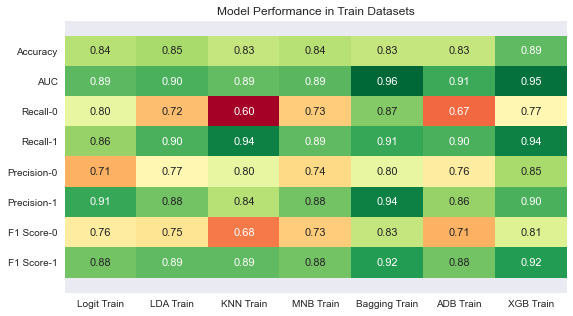

In [688]:
plt.subplots(figsize=(9,5))
ax = sns.heatmap(train_perf_data, cmap='RdYlGn', annot=True, fmt='.2f',annot_kws={"fontsize":11}, cbar = False)
bottom, top = ax.get_ylim()
ax.set_ylim (bottom + 0.5, top - 0.5)
plt.yticks(rotation=0)
plt.title('Model Performance in Train Datasets');

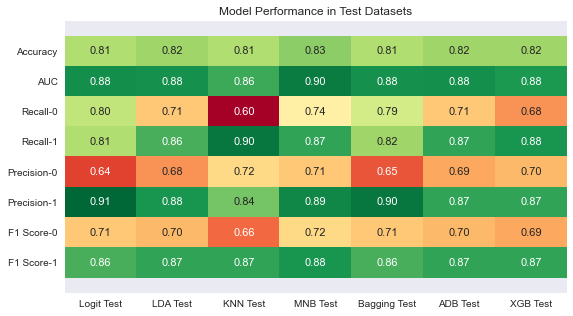

In [689]:
plt.subplots(figsize=(9,5))
ax = sns.heatmap(test_perf_data, cmap='RdYlGn', annot=True, fmt='.2f',annot_kws={"fontsize":11}, cbar = False)
bottom, top = ax.get_ylim()
ax.set_ylim (bottom + 0.5, top - 0.5)
plt.yticks(rotation=0) 
plt.title('Model Performance in Test Datasets');

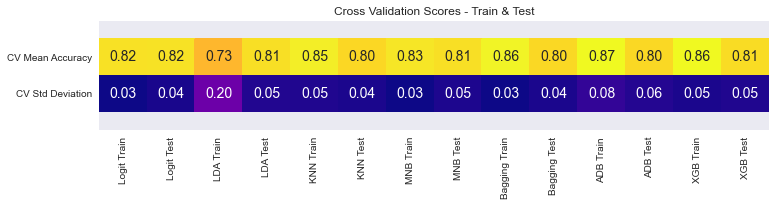

In [690]:
plt.subplots(figsize=(12,2))
ax = sns.heatmap(CV_data, cmap='plasma', annot=True, fmt='.2f',annot_kws={"fontsize":14}, cbar = False)
bottom, top = ax.get_ylim()
ax.set_ylim (bottom + 0.5, top - 0.5)
plt.yticks(rotation=0)
plt.title('Cross Validation Scores - Train & Test');

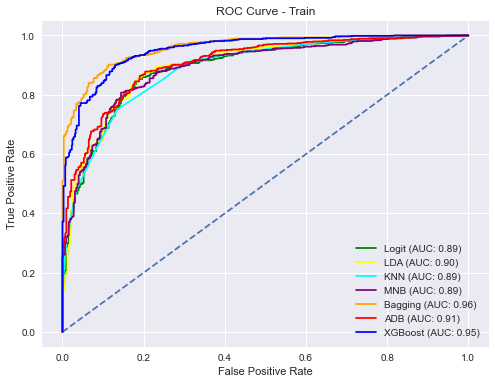

In [691]:
plt.figure(figsize=(8,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(logit_train_fpr, logit_train_tpr,color='green',label='Logit (AUC: %0.2f)'%logit_train_auc3)
plt.plot(LDA_train_fpr,LDA_train_tpr,color='yellow',label='LDA (AUC: %0.2f)'%LDA_train_auc1)
plt.plot(KNN_train_fpr,KNN_train_tpr,color='cyan',label='KNN (AUC: %0.2f)'%KNN_train_auc3)
plt.plot(MNB_train_fpr,MNB_train_tpr,color='purple',label='MNB (AUC: %0.2f)'%MNB_train_auc1)
plt.plot(Bagging_train_fpr,Bagging_train_tpr,color='orange',label='Bagging (AUC: %0.2f)'%Bagging_train_auc)
plt.plot(ADB_train_fpr,ADB_train_tpr,color='red',label='ADB (AUC: %0.2f)'%ADB_train_auc)
plt.plot(XGB_train_fpr,XGB_train_tpr,color='blue',label='XGBoost (AUC: %0.2f)'%XGB_train_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Train')
plt.legend(loc="lower right")

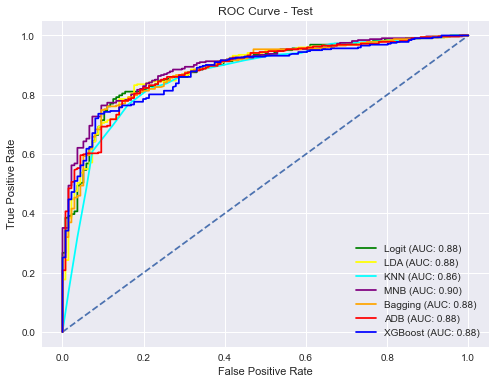

In [693]:
plt.figure(figsize=(8,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(logit_test_fpr, logit_test_tpr,color='green',label='Logit (AUC: %0.2f)'%logit_test_auc3)
plt.plot(LDA_test_fpr,LDA_test_tpr,color='yellow',label='LDA (AUC: %0.2f)'%LDA_test_auc1)
plt.plot(KNN_test_fpr,KNN_test_tpr,color='cyan',label='KNN (AUC: %0.2f)'%KNN_test_auc3)
plt.plot(MNB_test_fpr,MNB_test_tpr,color='purple',label='MNB (AUC: %0.2f)'%MNB_test_auc1)
plt.plot(Bagging_test_fpr,Bagging_test_tpr,color='orange',label='Bagging (AUC: %0.2f)'%Bagging_test_auc)
plt.plot(ADB_test_fpr,ADB_test_tpr,color='red',label='ADB (AUC: %0.2f)'%ADB_test_auc)
plt.plot(XGB_test_fpr,XGB_test_tpr,color='blue',label='XGBoost (AUC: %0.2f)'%XGB_test_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Test')
plt.legend(loc="lower right")